<a href="https://colab.research.google.com/github/GasanaElysee12/DAISYWORLD-MODEL/blob/main/daisy_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biogeophysical feedbacks: Daisy World

Acknowledgements:
Code is adapted from a python script by Andrew Bennett

## Introduction

Daisy world is a toy model of the planet designed to show how negative feedbacks with the biosphere can lead to a stable planet temperature over a wide range of solar luminosities. It was introduced by Watson and Lovelock (1983, Tellus B: Chemical and Physical Meteorology 35.4 (1983): 284-289., hereafter WL83) as an example of the Gaia theory, which proposed a solution to the weak young sun paradox. You are also referred to the excellent review paper, Wood et al. (2008), Rev. Geophys.,46, RG1001, doi:10.1029/2006RG000217, referred to W08 hereafter.

In the early stage of the planet, when life had already established, the sun was about 30\% weaker than today, and yet mean temperatures must have remained within the rough range of 0-40C which allow life to persist. The Gaia theory proposed a negative, "stabilizing feedback", whereby the presence of life reduces temperature variability, thus permitted the continued presence of life.

In response to criticism to the theory, WL83 introduced daisy world. Quite simply, a planet is occupied by two species of daisy with different albedos (see figure above), but the same temperature response function where growth is maximized at a certain temperature (22.5C in the paper).  Black daisies are warmer than white due to their lower albedo. 

The model is simple, consisting of two ODEs that describe the evolution of the black and white daisies as a function of the temperature and three diagnostic equations that describe mean albedo of the planet, the resulting mean temperature assuming energy balance, and the local temperatures of the daisy patches, which are a function of the flower albedo.

Before we start we need to import the modules we will need for the code, numpy and matplotlib for the graphics, and we define a few constants.

![Daisy world](https://personal.ems.psu.edu/~dmb53/Earth_System_Models/Daisyworld_files/Daisyworld_pict.jpg)

Daisyworld image from PSU, David Bice.

## The model
The model is simple, consisting of two ODEs that describe the evolution of the black and white daisies as a function of the temperature and three diagnostic equations that describe mean albedo of the planet, the resulting mean temperature assuming energy balance, and the local temperatures of the daisy patches, which are a function of the flower albedo.

Before we start we need to import the modules we will need for the code, numpy and matplotlib for the graphics, and we define a few constants.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['font.size'] = '20'


keloff=273.15 # to convert between K and deg C 
sigma=5.67e-8 # S-B constant
S0=1000 # solar constant W/m**2
transport=20  # q' in equation 7 of WL83, lineared diffusion heat transport - this relates local albedo perturbations to temperature perturbations
maxloop=100 # number of iterations to allow daisies to equilibrate.
luminosity=np.arange(0.5,1.7,0.01) # range of luminosities ratios over which we will loop, starting from low to high


In [ ]:
print (maxloop)

100


## Plant response function

We now define the plant growth temperature response function.  This is a quadratic curve that peaks at T=22.5C (you may change this value).  

Equation 3 of WL83:

$$
\beta=1-0.003265(22.5-T)^2
$$

The max function ensures positive-definite growth rates, setting the growth rate to zero below about 5C and above 40C.  NOTE: Be careful of the units for temperature, which switch between deg C and K in the code and paper. 

This plant response function is identical for both kinds of daisies, black and white, thus the difference in growth rates can only be due to their impact on the local temperature due to their albedo. 

Let's code up the temperature response function now, note that we also define the plant death rate, which is introduced in the equations below ($\gamma$):

In [ ]:
import seaborn as sns

Td_ideal=22.5+keloff  # peak growth rate for daisies
birth_rate_k=0.003265 #
death_rate=0.3 # fixed death rate gamma in equation 1

T_opt=np.arange(15,28.5,1.5)

In [ ]:
dict_beta.keys()

dict_keys(['beta_15.0', 'beta_16.5', 'beta_18.0', 'beta_19.5', 'beta_21.0', 'beta_22.5', 'beta_24.0', 'beta_25.5', 'beta_27.0'])

In [ ]:
values=[list(i) for i in dict_beta.values()]
values

In [ ]:
kk={i:values[i] for i in range(9)}
kk

In [ ]:
from operator import itemgetter
for k in kk:
    kk[k].sort(key=itemgetter(0))

In [ ]:
kk

In [ ]:
# max_data=[kk[i][-1] for k in kk.keys()]

In [ ]:
max_data=[(0.999540859375, 287.775),(0.999540859375, 290.025),(0.999540859375, 292.275),(0.999540859375, 294.525),(1.0, 295.65),(0.999540859375, 296.775),(0.999540859375, 299.025),(1.0, 300.15)]

In [ ]:
data=dict(Temp=[],lumino=[])
for i in max_data:
  data['Temp'].append(i[1])
  data['lumino'].append(i[0])


In [ ]:
data

# Death rate distribution with respect to the temperature

<ipython-input-71-e6f0b5b8f27c>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x=data['Temp'],y=data['lumino'],fill=True,palette=['g','m','k','b','y','r'],cbar=True,levels=[0.,0.1,0.2,0.3,0.4,.5,.6,.7,.8])


Text(0, 0.5, 'birth rate')

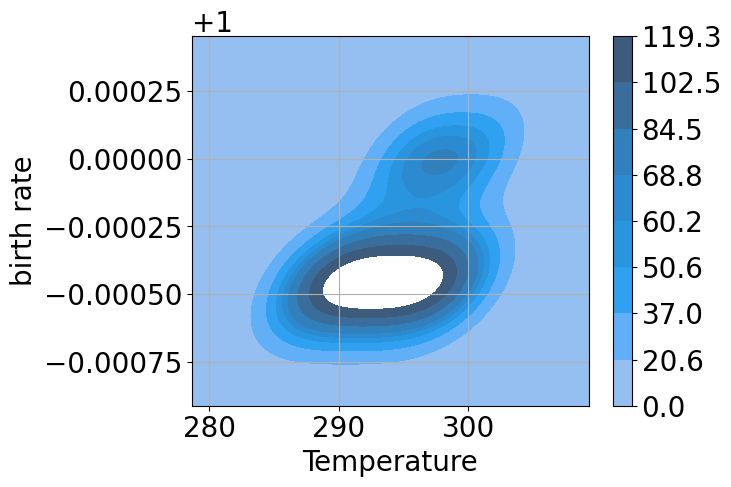

In [ ]:
sns.kdeplot(x=data['Temp'],y=data['lumino'],fill=True,palette=['g','m','k','b','y','r'],cbar=True,levels=[0.,0.1,0.2,0.3,0.4,.5,.6,.7,.8])
plt.grid()
plt.xlabel('Temperature')
plt.yticks(fontsize=20)
# changing the fontsize of xticks
plt.xticks(fontsize=20)
plt.ylabel('birth rate')

# Birth rate of daisyworld

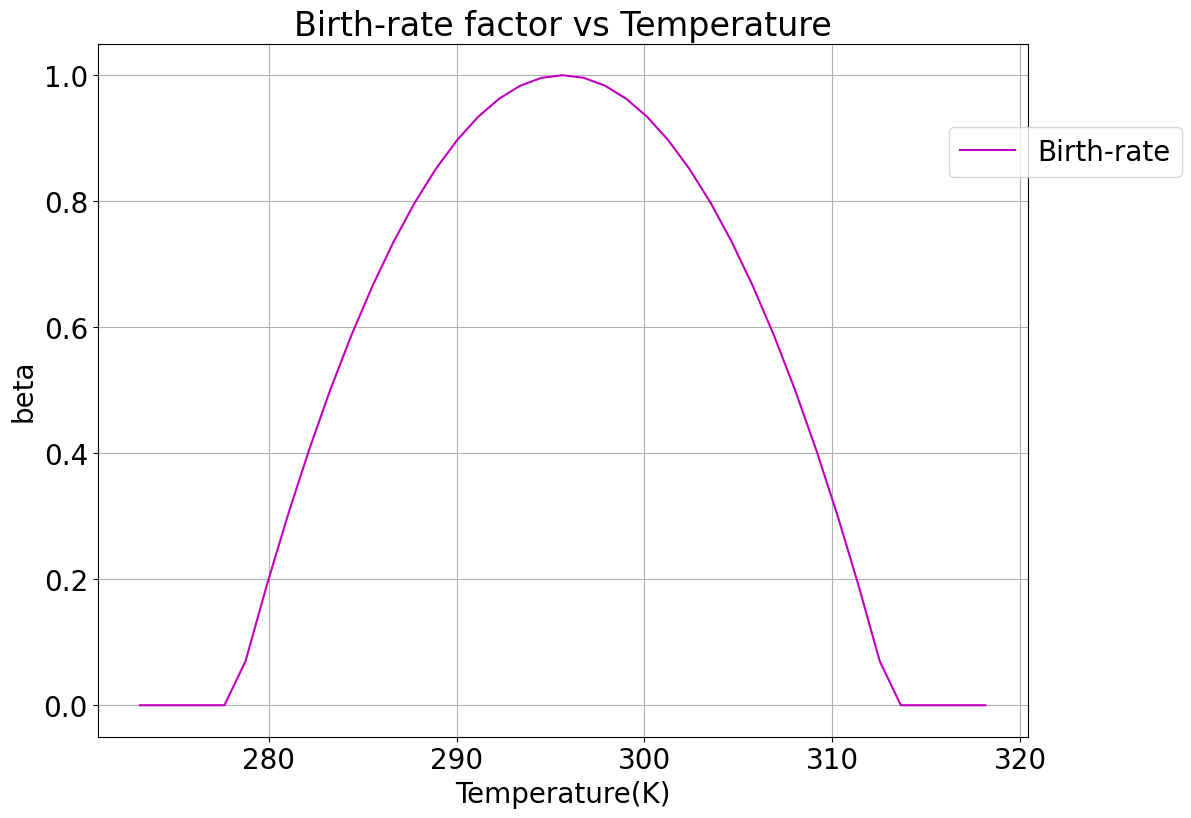

In [ ]:
tarr=np.linspace(0,45,41)+keloff
fig,ax=plt.subplots(figsize=(12,9))
br=[birth_rate(22.5+keloff,t) for t in tarr]
ax.plot(tarr,br,'m',label='Birth-rate')
ax.set_xlabel("Temperature(K)")
ax.grid('on')
ax.set_title('Birth-rate factor vs Temperature')
ax.set_ylabel("beta")
ax.legend(bbox_to_anchor=(0.9,0.9))
plt.yticks(fontsize=20)
# changing the fontsize of xticks
plt.xticks(fontsize=20)
plt.savefig('Birth_rate.png',dpi=400)
plt.show()

## The plant function types

We now introduce some other parameters in the model, the white daisy (dw) and black daisy (db) and bare soil (bs) albedoes: 

In [ ]:
alb_dw=0.75 # white daisies albedo 
alb_db=0.25 # black daisies
alb_bs=0.5  # bare soil 

We perform the main loop over normalized luminosity values (so L=1 implies present day solar constant), and for each luminosity find the stable solution of daisy area and temperature.

The equations we solve in turn are:

Equation 5 of WL83, this simply states that the mean planetary albedo is an area-weighted average of the daisies and bare soil values. 

$$
A_p=A_{dw}\alpha_{dw}+A_{db}\alpha_{db}+A_{bs}\alpha_{bs}
$$

where $\alpha$ is the fractional coverage of the white daisies (dw), black daises (db) or bare soil (bs) and $A$ is the respective albedo of each land cover type.  (NOTE: We use this notation to follow WL83 and W08, but do not get confused as we usually use $\alpha$ for albedo in the course).


We then calculate the planet mean temperature, which is a simple energy balance equation between incoming solar and emitted infrared radiation (Equation 4 of WL83) (note they are ignoring the emissivity of the grey atmosphere for simplicity, here the atmosphere is transparent to SW and IR radn, it doesn't really change anything in the behaviour of the model). 

$$
T_e=\sqrt[4]{\frac{LS_0(1-A_p)}{\sigma}}
$$



The next step is to calculate the local temperature resulting from the presence of the daisies.  In WL83 this is not explained in much detail, and we thus refer to the excellent description of W08: The local temperatures $T_{dw}$ and $T_{db}$ and the bare soil temperature $T_{bs}$ are defined by making a simplifying assumption about the heat transfer, essentially a linearization of adiffusion term (refer to the 1D zonal model for ice albedo feedback). This gives a degree of connectedness to the daisy patches without introducing space explicitly. A parameter $q$ is defined as the heat transfer coefficient in WL83, thereby defining the local temperatures as (equation 7 of WL83 or 5-7 in W08):

$$
T_{dw}=q(A_p-A_{dw})+T_e
$$

and similarly for the black daisies. 



Now we only have to define the two key equations, which describe the birthrate of each daisy type which is a function of their optimum temperatures, using the birthrate function defined above.  Each daisies has a constant death rate $\gamma$, converting daisy coverage back to bare soil. These equations are standard for population dynamics, disease models etc.  These are eqn. 1 in WL83 or eqn 2 in W08:

$$
\frac {\partial \alpha_{dw}}{\partial t}=\alpha_{dw}(\alpha_{bs}\beta(T_{dw})-\gamma)
$$

$$
\frac {\partial \alpha_{db}}{\partial t}=\alpha_{db}(\alpha_{bs}\beta(T_{db})-\gamma)
$$

In the code below we note the solver is not accurate, as the system is coupled and the integration method is explicit, but it simple to understand and will do for present purposes.  If you have finished the ICTP diploma course in numerical methods I/II you may like to replace this, implementing a Runge-Kutta 4th order solver for example. 

## Questions to investigate


1.What happens if you change the albedo values of the black and/or white daisies?  Try altering the albedos but keeping $A_{db} < A_{bs} < A_{dw}$.  But then also try $A_{db} < A_{dw} < A_{bs}$ or $A_{bs} < A_{db} < A_{dw}$. 

2.Tinker with the daisy-dependent death rates and see what happens

3.What happens if, after arriving at a luminosity $L$ of 1.6 you turn the sun back down again?  (i.e. reverse the luminosity loop). Do the solution branches follow each other exactly, or is there a hysteresis? Why? 
    
4.What happens if for each value of luminosity you start from a near bare earth? (1% coverage for each daisy type)  At which values of luminosity does the population crash occur?

5.What happens if you only allow one daisy type?

6.What happens if you introduce 3 (or more) daisy types? 

7. Watson and Lovelock introduce another experiment in which black daisies are warmer, but they cool the planet by introducing clouds.  This experiment can be conducted by assuming that the TOA albedo for black daisy areas is 0.8, the daises are still warmer than white daisies due to their lower albedo (not very physical!) - See if you can reproduce fig 2 of Watson and Lovelock with this experiment.  What happens to the white daisies?

8. Can you introduce adaptation? You could apply random mutations to the constants in the $\beta$ plant growth function over time, perhaps introduces to a third type with a seed fraction at a particular time.


Have fun and above all, never stop asking yourself "what if?"

# By reversing the solar luminosity after getting to 1.6

In [ ]:
luminosity_backward=luminosity[::-1]
new_luminosity=np.hstack((luminosity,luminosity_backward))
# new_luminosity

In [ ]:
T_opt=22.5+273.15
def birth_rate(T):
  return max(1.-0.003265*(T_opt-T)**2,0.0)

In [ ]:
# store arrays 
area_dw_v=[]
area_db_v=[]
area_bs_v=[]
To_be_taken_dw=[]
Tobe_taken_db=[]
Tobe_taken_Tpv=[]
Tobe_taken_Tref=[]
T_p_v=[]
T_ref=[]

area_dw=area_db=0.01 # initial conditions

#luminosity=[1]

# loop over luminosity...
for iflux,flux in enumerate(new_luminosity):
    # initial conditions are taken from a previous run, subject to 
    # a minimum of 1% in case the species had died out 
    area_dw=max(area_dw,0.01)   # white daisies can't die out
    area_db=max(area_db,0.01)   # black daises neither  
    area_bs=1.0-area_dw-area_db # bare soil fraction
    delta_db=delta_dw=1
    
    iloop=0 
    
    while (abs(delta_db)+abs(delta_dw))>1.e-8:
        iloop+=1
        
        # EQN 5: calculate weighted average albedo
        alb_p=area_dw*alb_dw+area_db*alb_db+area_bs*alb_bs
        
        # EQN 4: calculate planet mean temperature
        T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
         
        # EQN 7: calculate local temperatures
        T_db=transport*(alb_p-alb_db)+T_p
        T_dw=transport*(alb_p-alb_dw)+T_p
        
        # EQN 3: calculate birth rate beta
        birth_rate_db=birth_rate(T_db)
        birth_rate_dw=birth_rate(T_dw)
           
        # EQN 1: change in daisy area
        delta_db=area_db*(birth_rate_db*area_bs-death_rate)
        delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
        area_db+=delta_db
        area_dw+=delta_dw
        
        # update areas
        area_bs=1.0-area_db-area_dw

        #print (area_db,area_dw,area_bs)
     
    # print (flux," converged after iteration ",iloop)
    # store the value...
    area_db_v.append(area_db)
    area_dw_v.append(area_dw)
    area_bs_v.append(area_bs)
    T_p_v.append(T_p)
    T_ref.append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))
To_be_taken_dw=To_be_taken_dw+area_dw_v
Tobe_taken_db=Tobe_taken_db+area_db_v
Tobe_taken_Tpv=Tobe_taken_Tpv+T_p_v
Tobe_taken_Tref=Tobe_taken_Tref+T_ref
summ_area=[(i+j) for (i,j)in zip(area_db_v,area_dw_v)]


## Results

Now we just need to plot the results:

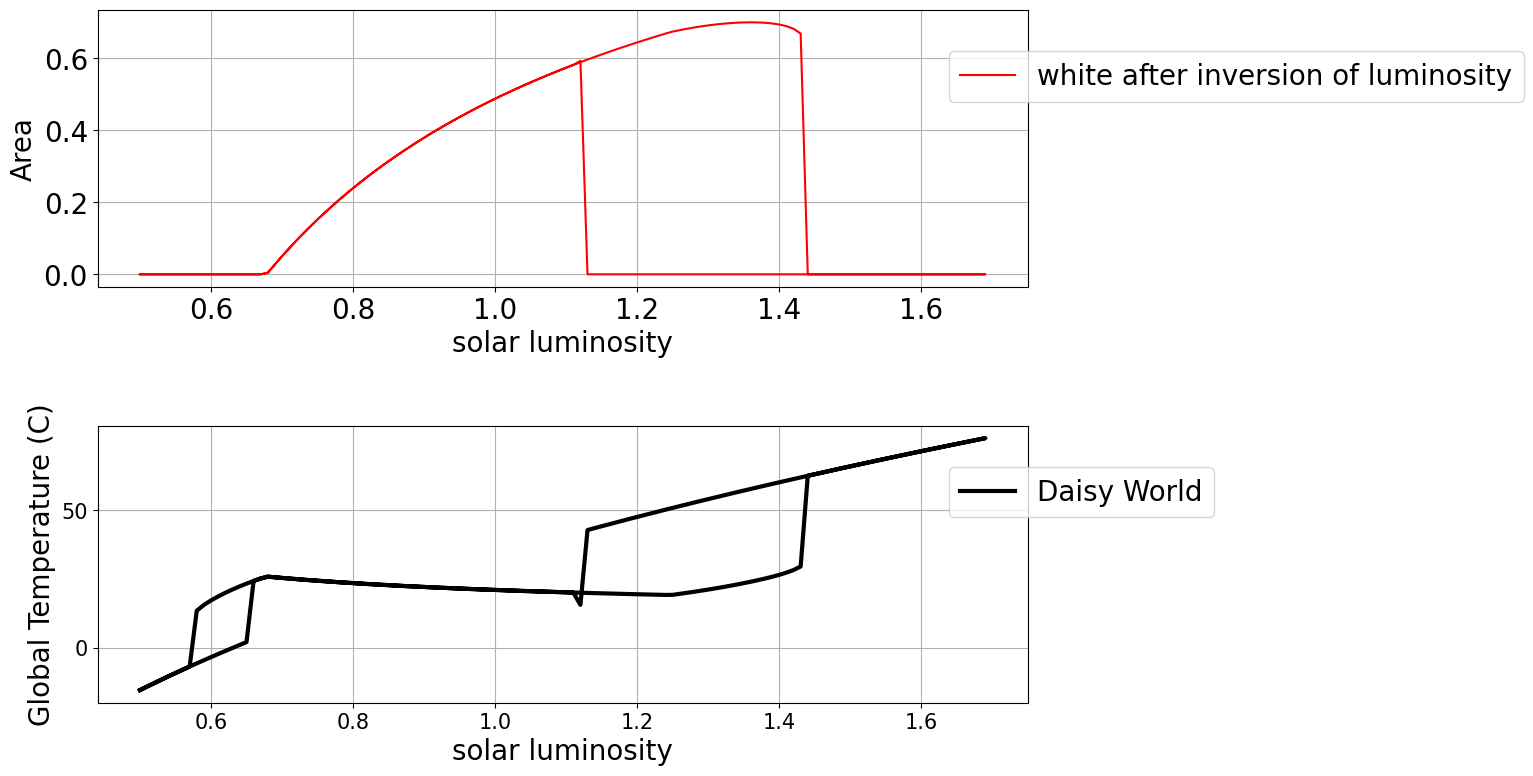

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(12,9))
# ax[0].plot(new_luminosity,area_db_v,color='black',label='black')
ax[0].plot(new_luminosity,area_dw_v,color='red',label='white after inversion of luminosity')
# ax[0].plot(luminosity,summ_area,color='blue',label='summ of all')
ax[0].set_xlabel('solar luminosity')
ax[0].set_ylabel('Area')
ax[0].grid('on')
ax[0].legend(bbox_to_anchor=(0.9,0.9))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[1].plot(new_luminosity,np.array(T_p_v)-keloff,color="black",label="Daisy World",linewidth=3)
# ax[1].plot(new_luminosity,np.array(T_ref)-keloff,color="red",label="Bare Soil World :-(")
ax[1].set_xlabel('solar luminosity')
ax[1].set_ylabel('Global Temperature (C)')
ax[1].grid()
ax[1].legend(bbox_to_anchor=(0.9,0.9))
plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)
plt.savefig('Luminosity_inversion_white.png',dpi=400)


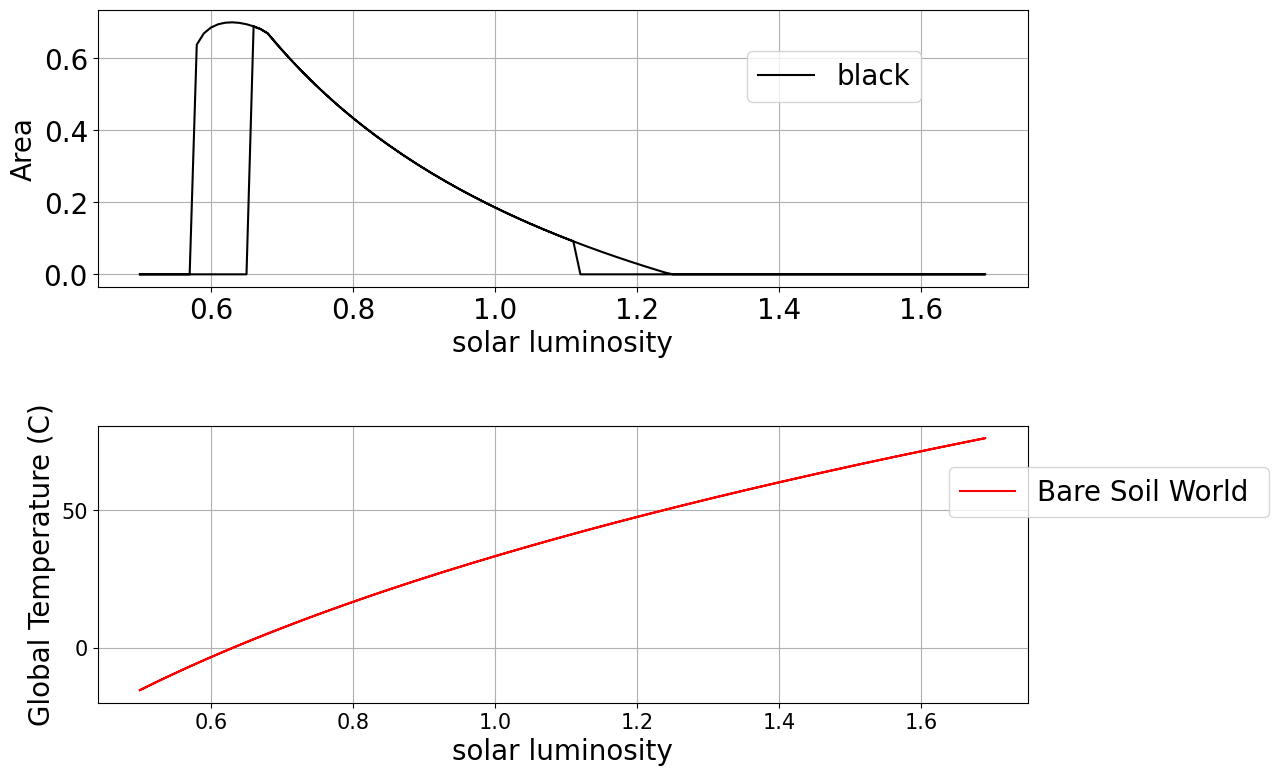

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(12,9))
ax[0].plot(new_luminosity,area_db_v,color='black',label='black')
# ax[0].plot(new_luminosity,area_dw_v,color='red',label='white after inversion of luminosity')
# ax[0].plot(new_luminosity,summ_area,color='blue',label='summ of all')
ax[0].set_xlabel('solar luminosity')
ax[0].set_ylabel('Area')
ax[0].grid('on')
plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)
ax[0].legend(bbox_to_anchor=(0.9,0.9))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
# ax[1].plot(new_luminosity,np.array(T_p_v)-keloff,color="black",label="Daisy World :-)",linewidth=3)
ax[1].plot(new_luminosity,np.array(T_ref)-keloff,color="red",label="Bare Soil World ")
ax[1].set_xlabel('solar luminosity')
ax[1].set_ylabel('Global Temperature (C)')
plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)
ax[1].grid()
ax[1].legend(bbox_to_anchor=(0.9,0.9))
plt.savefig('Luminosity_inversion-black.png',dpi=400)


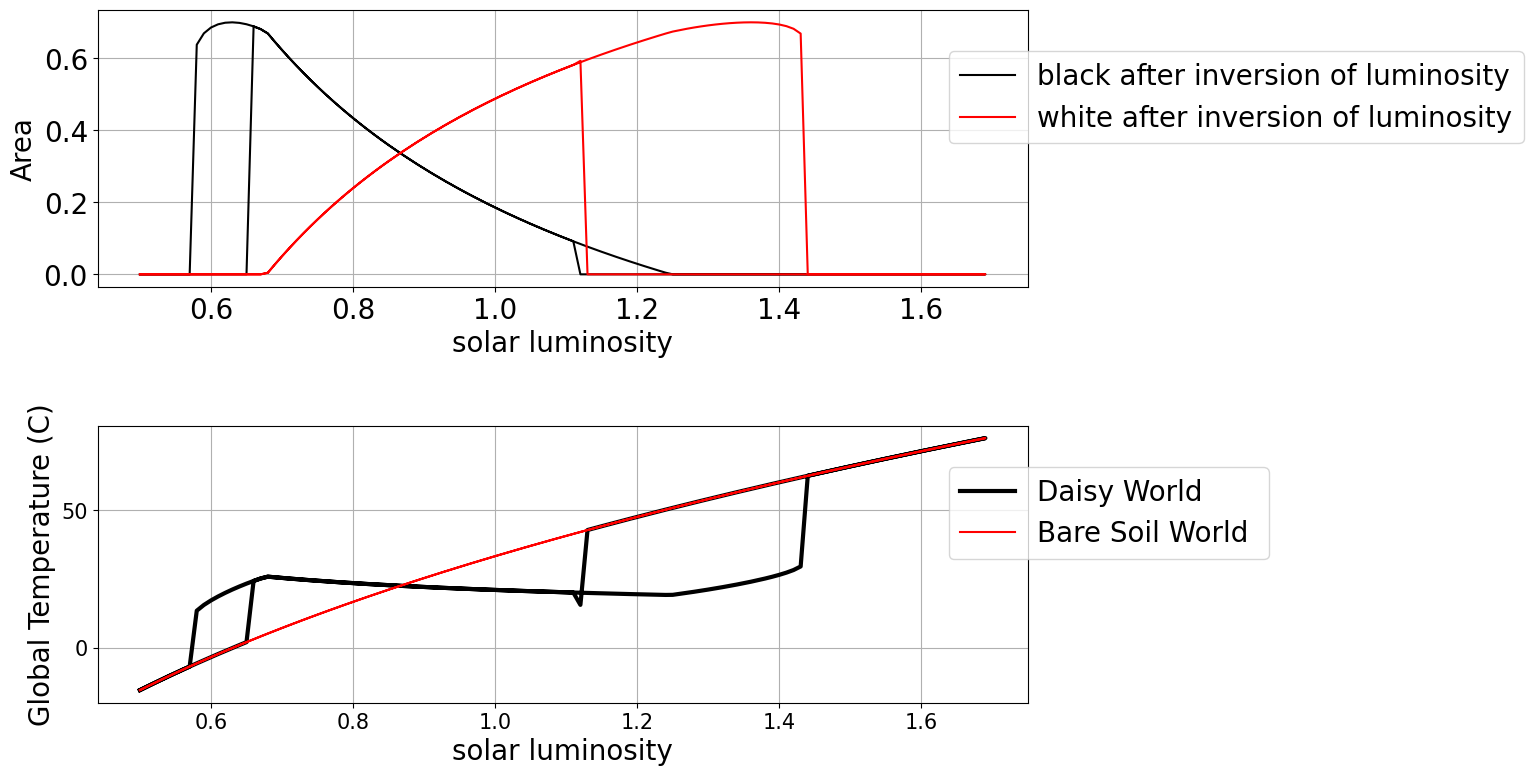

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(12,9))
ax[0].plot(new_luminosity,area_db_v,color='black',label='black after inversion of luminosity')
ax[0].plot(new_luminosity,area_dw_v,color='red',label='white after inversion of luminosity')
# ax[0].plot(new_luminosity,summ_area,color='blue',label='summ of all')
ax[0].set_xlabel('solar luminosity')
ax[0].set_ylabel('Area')
ax[0].grid('on')
plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)
ax[0].legend(bbox_to_anchor=(0.9,0.9))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[1].plot(new_luminosity,np.array(T_p_v)-keloff,color="black",label="Daisy World",linewidth=3)
ax[1].plot(new_luminosity,np.array(T_ref)-keloff,color="red",label="Bare Soil World ")
ax[1].set_xlabel('solar luminosity')
ax[1].set_ylabel('Global Temperature (C)')
plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)
ax[1].grid()
ax[1].legend(bbox_to_anchor=(0.9,0.9))
plt.savefig('Luminosity_inversion-both.png',dpi=400)

#By increase the albedo of the black daisy

In [ ]:
# store arrays 
area_dw_v=[]
area_db_v=[]
area_bs_v=[]
To_be_taken_dw=[]
Tobe_taken_db=[]
Tobe_taken_Tpv=[]
Tobe_taken_Tref=[]
T_p_v=[]
T_ref=[]
alb_db, alb_bs, alb_dw= 0.3, 0.5, 0.75

area_dw=area_db=0.01 # initial conditions

#luminosity=[1]

# loop over luminosity...
for iflux,flux in enumerate(luminosity):
    # initial conditions are taken from a previous run, subject to 
    # a minimum of 1% in case the species had died out 
    area_dw=max(area_dw,0.01)   # white daisies can't die out
    area_db=max(area_db,0.01)   # black daises neither  
    area_bs=1.0-area_dw-area_db # bare soil fraction
    delta_db=delta_dw=1
    
    iloop=0 
    
    while (abs(delta_db)+abs(delta_dw))>1.e-8:
        iloop+=1
        
        # EQN 5: calculate weighted average albedo
        alb_p=area_dw*alb_dw+area_db*alb_db+area_bs*alb_bs
        
        # EQN 4: calculate planet mean temperature
        T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
         
        # EQN 7: calculate local temperatures
        T_db=transport*(alb_p-alb_db)+T_p
        T_dw=transport*(alb_p-alb_dw)+T_p
        
        # EQN 3: calculate birth rate beta
        birth_rate_db=birth_rate(T_db)
        birth_rate_dw=birth_rate(T_dw)
           
        # EQN 1: change in daisy area
        delta_db=area_db*(birth_rate_db*area_bs-death_rate)
        delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
        area_db+=delta_db
        area_dw+=delta_dw
        
        # update areas
        area_bs=1.0-area_db-area_dw

        #print (area_db,area_dw,area_bs)
     
    # print (flux," converged after iteration ",iloop)
    # store the value...
    area_db_v.append(area_db)
    area_dw_v.append(area_dw)
    area_bs_v.append(area_bs)
    T_p_v.append(T_p)
    T_ref.append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))
To_be_taken_dw=To_be_taken_dw+area_dw_v
Tobe_taken_db=Tobe_taken_db+area_db_v
Tobe_taken_Tpv=Tobe_taken_Tpv+T_p_v
Tobe_taken_Tref=Tobe_taken_Tref+T_ref
summ_area=[(i+j) for (i,j)in zip(area_db_v,area_dw_v)]


# let's manipulate the value of albedo:

alb_db: 0.3 -->> 0.10

-----------------------

alb_bs: No change


------------------------

alb_dw:  0.75  ----->>  0.80

120


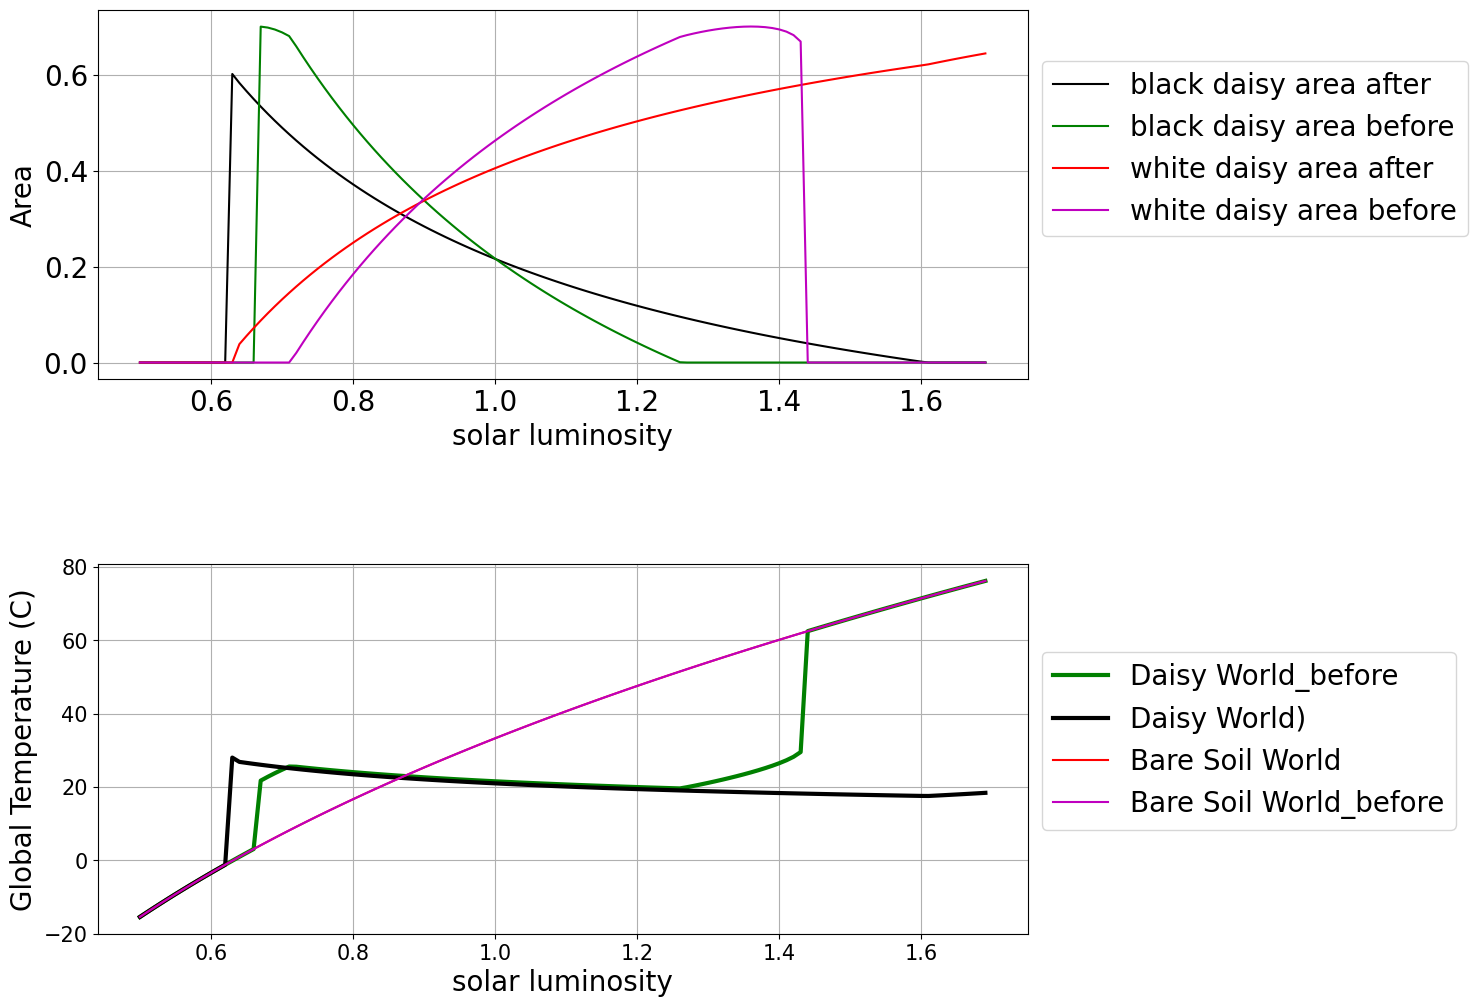

In [ ]:
alb_dw=0.90# white daisies albedo 
alb_db=0.10 # black daisies
alb_bs=0.50  # bare soil 
area_dw_v=[]
area_db_v=[]
summ_area=[]
area_bs_v=[]
T_p_v=[]
T_ref=[]

area_dw=area_db=0.01 # initial conditions

#luminosity=[1]

# loop over luminosity...
for iflux,flux in enumerate(luminosity):
    # initial conditions are taken from a previous run, subject to 
    # a minimum of 1% in case the species had died out 
    area_dw=max(area_dw,0.01)   # white daisies can't die out
    area_db=max(area_db,0.01)   # black daises neither  
    area_bs=1.0-area_dw-area_db # bare soil fraction
    delta_db=delta_dw=1
    
    iloop=0 
    
    while (abs(delta_db)+abs(delta_dw))>1.e-8:
        iloop+=1
        
        # EQN 5: calculate weighted average albedo
        alb_p=area_dw*alb_dw+area_db*alb_db+area_bs*alb_bs
        
        # EQN 4: calculate planet mean temperature
        T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
         
        # EQN 7: calculate local temperatures
        T_db=transport*(alb_p-alb_db)+T_p
        T_dw=transport*(alb_p-alb_dw)+T_p
        
        # EQN 3: calculate birth rate beta
        birth_rate_db=birth_rate(T_db)
        birth_rate_dw=birth_rate(T_dw)
           
        # EQN 1: change in daisy area
        delta_db=area_db*(birth_rate_db*area_bs-death_rate)
        delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
        area_db+=delta_db
        area_dw+=delta_dw
        
        # update areas
        area_bs=1.0-area_db-area_dw

        #print (area_db,area_dw,area_bs)
     
    # print (flux," converged after iteration ",iloop)
    # store the value...
    area_db_v.append(area_db)
    area_dw_v.append(area_dw)
    area_bs_v.append(area_bs)
    T_p_v.append(T_p)
    T_ref.append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))

summ_area=[(i+j) for (i,j)in zip(area_db_v,area_dw_v)]
print(len(To_be_taken_dw))

fig,ax=plt.subplots(2,1,figsize=(12,12))
ax[0].plot(luminosity,area_db_v,color='black',label="black daisy area after ")
ax[0].plot(luminosity,Tobe_taken_db,c='g',label='black daisy area before')
ax[0].plot(luminosity,area_dw_v,color='red',label='white daisy area after')
# ax[0].plot(luminosity,summ_area,color='blue',label='summ of all')
ax[0].plot(luminosity,To_be_taken_dw,color='m',label='white daisy area before')

plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)

ax[0].set_xlabel('solar luminosity')
ax[0].set_ylabel('Area')
ax[0].grid('on')
ax[0].legend(bbox_to_anchor=(1.,0.9))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[1].plot(luminosity,np.array(Tobe_taken_Tpv)-keloff,color="green",label="Daisy World_before",linewidth=3)
ax[1].plot(luminosity,np.array(T_p_v)-keloff,color="black",label="Daisy World)",linewidth=3)
ax[1].plot(luminosity,np.array(T_ref)-keloff,color="red",label="Bare Soil World ")
ax[1].plot(luminosity,np.array(Tobe_taken_Tref)-keloff,color="m",label="Bare Soil World_before")
ax[1].set_xlabel('solar luminosity')
ax[1].set_ylabel('Global Temperature (C)')
ax[1].grid()
plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)
ax[1].legend(bbox_to_anchor=(1.0,0.8))
plt.savefig('After_rising_albedo.jpg',dpi=400)


In [ ]:
def Albedo_modifier(alb_db=0.25,alb_bs=0.5,alb_dw=0.75):
  return alb_db,alb_bs,alb_dw 
  
def death_rates(value=0.30):
  return value

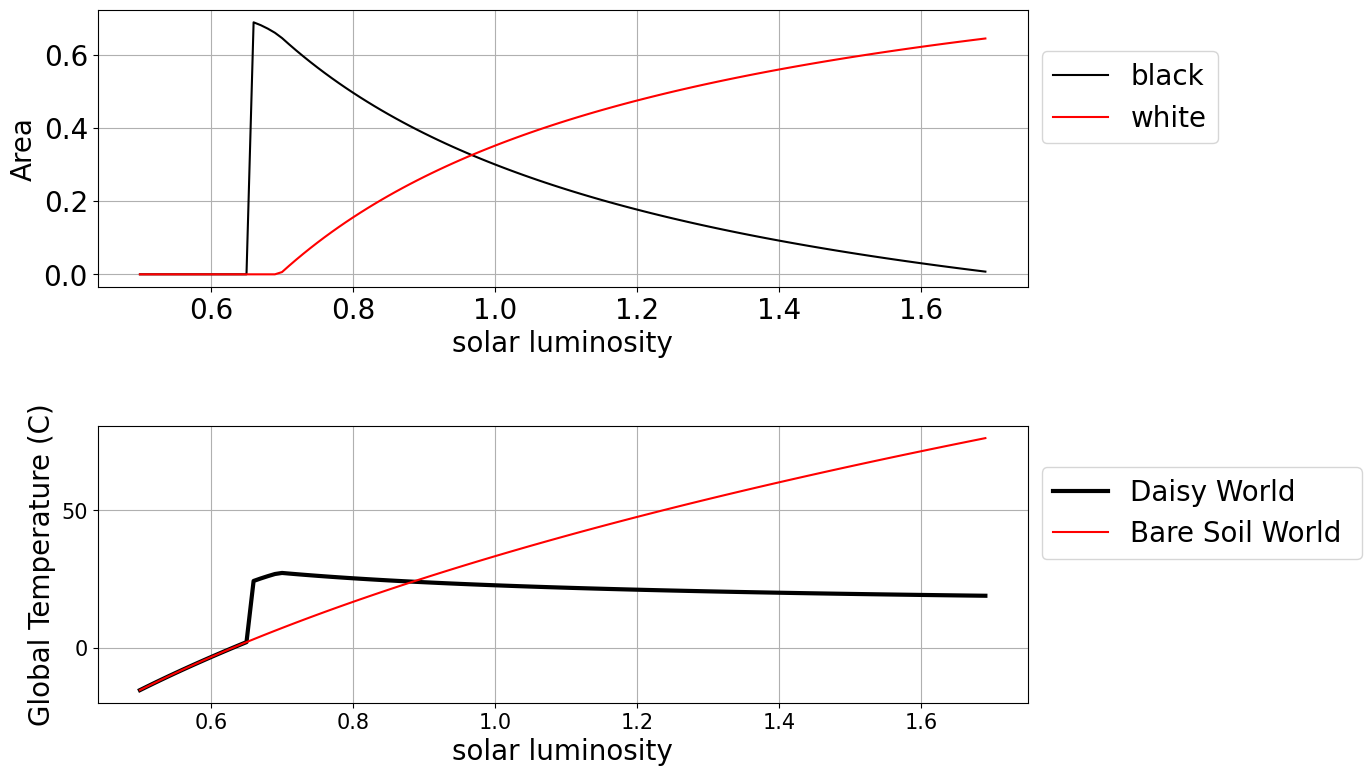

In [ ]:
alb_db,alb_bs,alb_dw =Albedo_modifier(alb_db=0.25,alb_bs=0.5,alb_dw=0.90)
# store arrays 
# alb_db=0.10

death_rate=death_rates()
area_dw_v=[]
area_db_v=[]
area_bs_v=[]
T_p_v=[]
T_ref=[]

area_dw=area_db=0.01 # initial conditions
#luminosity=[1]

# loop over luminosity...
for iflux,flux in enumerate(luminosity):
    # initial conditions are taken from a previous run, subject to 
    # a minimum of 1% in case the species had died out 
    area_dw=max(area_dw,0.01)   # white daisies can't die out
    area_db=max(area_db,0.01)   # black daises neither  
    area_bs=1.0-area_dw-area_db # bare soil fraction
    delta_db=delta_dw=1
    
    iloop=0 
    
    while (abs(delta_db)+abs(delta_dw))>1.e-8:
        iloop+=1
        
        # EQN 5: calculate weighted average albedo
        alb_p=area_dw*alb_dw+area_db*alb_db+area_bs*alb_bs
        
        # EQN 4: calculate planet mean temperature
        T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
        
        # EQN 7: calculate local temperatures
        T_db=transport*(alb_p-alb_db)+T_p
        T_dw=transport*(alb_p-alb_dw)+T_p
        
        # EQN 3: calculate birth rate beta
        birth_rate_db=birth_rate(T_db)
        birth_rate_dw=birth_rate(T_dw)
          
        # EQN 1: change in daisy area
        delta_db=area_db*(birth_rate_db*area_bs-death_rate)
        delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
        area_db+=delta_db
        area_dw+=delta_dw
        
        # update areas
        area_bs=1.0-area_db-area_dw

        #print (area_db,area_dw,area_bs)
    
    # print (flux," converged after iteration ",iloop)
    # store the value...
    area_db_v.append(area_db)
    area_dw_v.append(area_dw)
    area_bs_v.append(area_bs)
    T_p_v.append(T_p)
    T_ref.append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))




fig,ax=plt.subplots(2,1,figsize=(12,9))
ax[0].plot(luminosity,area_db_v,color='black',label='black')
# ax[0].plot(luminosity,Tobe_taken_db,c='g',label='b_before')
ax[0].plot(luminosity,area_dw_v,color='red',label='white')
# ax[0].plot(luminosity,To_be_taken_dw,color='m',label='w_before')
plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)

ax[0].set_xlabel('solar luminosity')
ax[0].set_ylabel('Area')
ax[0].grid('on')
ax[0].legend(bbox_to_anchor=(1.,0.9))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
# ax[1].plot(luminosity,np.array(Tobe_taken_Tpv)-keloff,color="green",label="Daisy World_before :-)",linewidth=3)
ax[1].plot(luminosity,np.array(T_p_v)-keloff,color="black",label="Daisy World",linewidth=3)
ax[1].plot(luminosity,np.array(T_ref)-keloff,color="red",label="Bare Soil World ")
# ax[1].plot(luminosity,np.array(Tobe_taken_Tref)-keloff,color="m",label="Bare Soil World_before :-(")
ax[1].set_xlabel('solar luminosity')
ax[1].set_ylabel('Global Temperature (C)')
ax[1].grid()
plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)
ax[1].legend(bbox_to_anchor=(1.,0.9))
# plt.pause(0.5)
plt.savefig('Raise_white_albedo.jpeg',dpi=400)
plt.show()



# Here we are going to change the death rate value

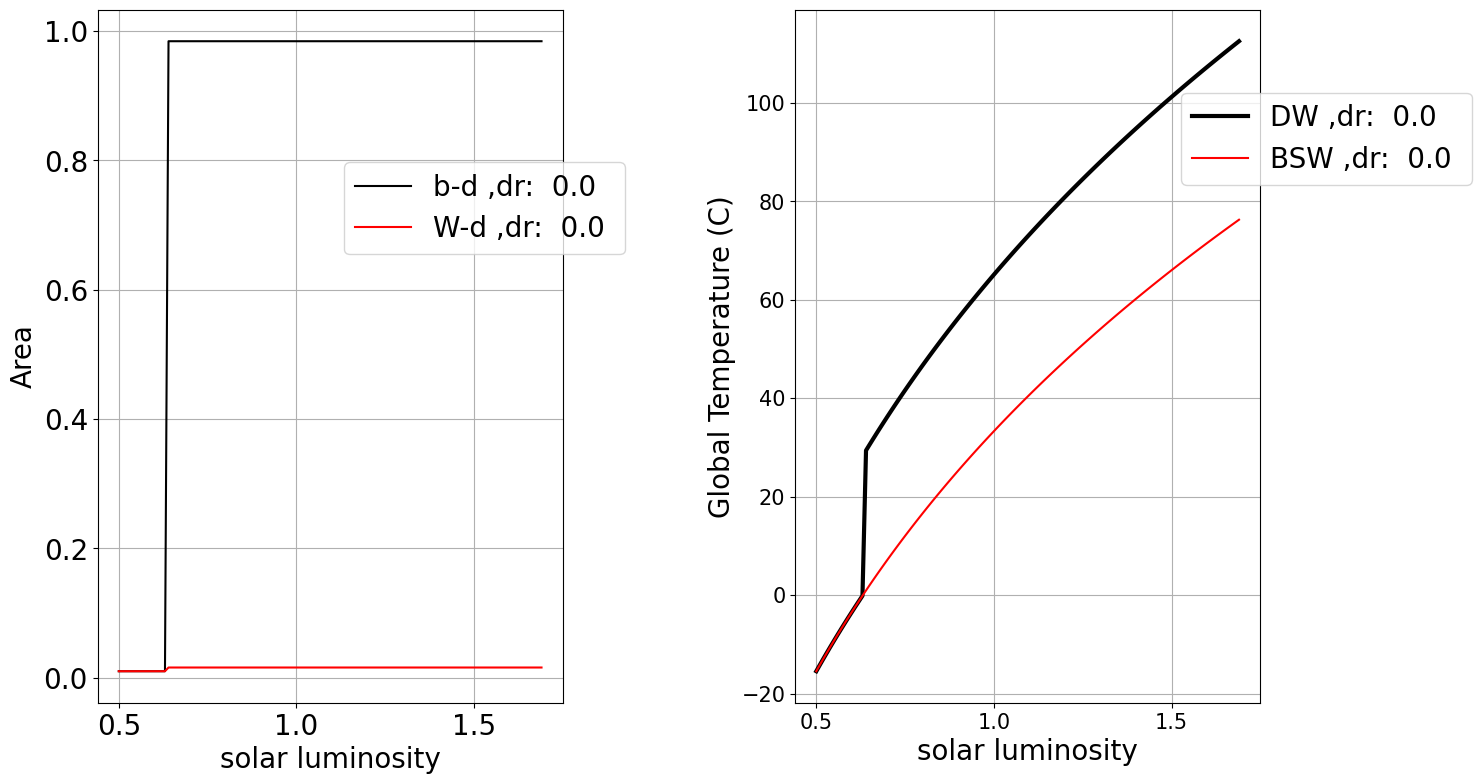

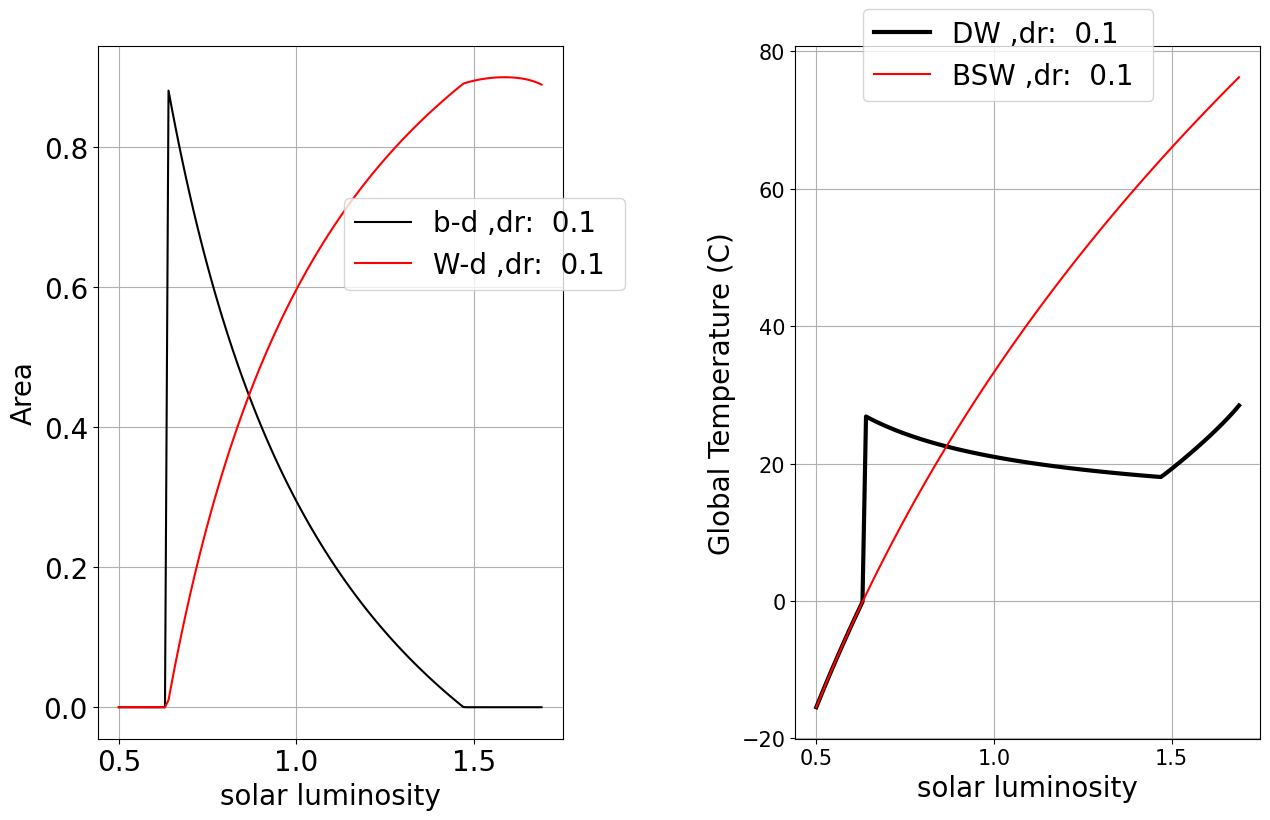

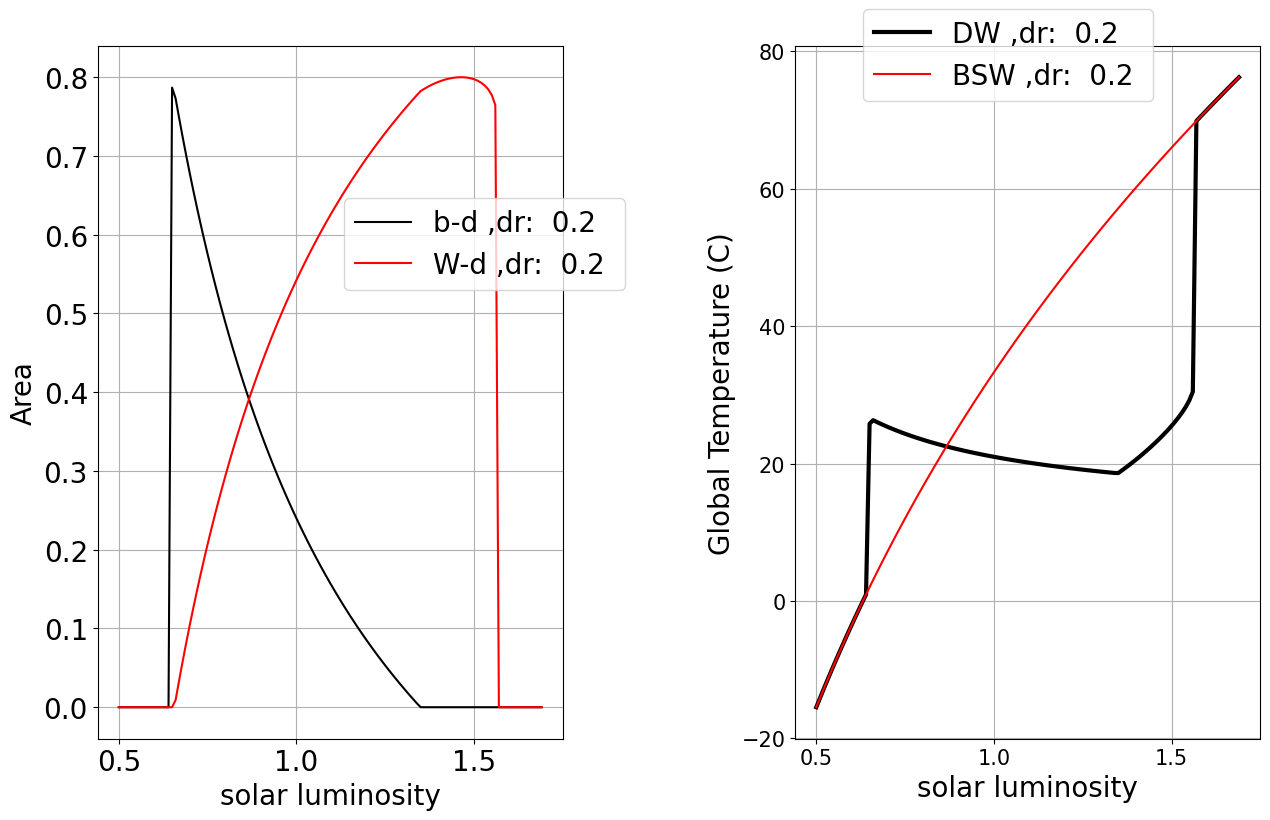

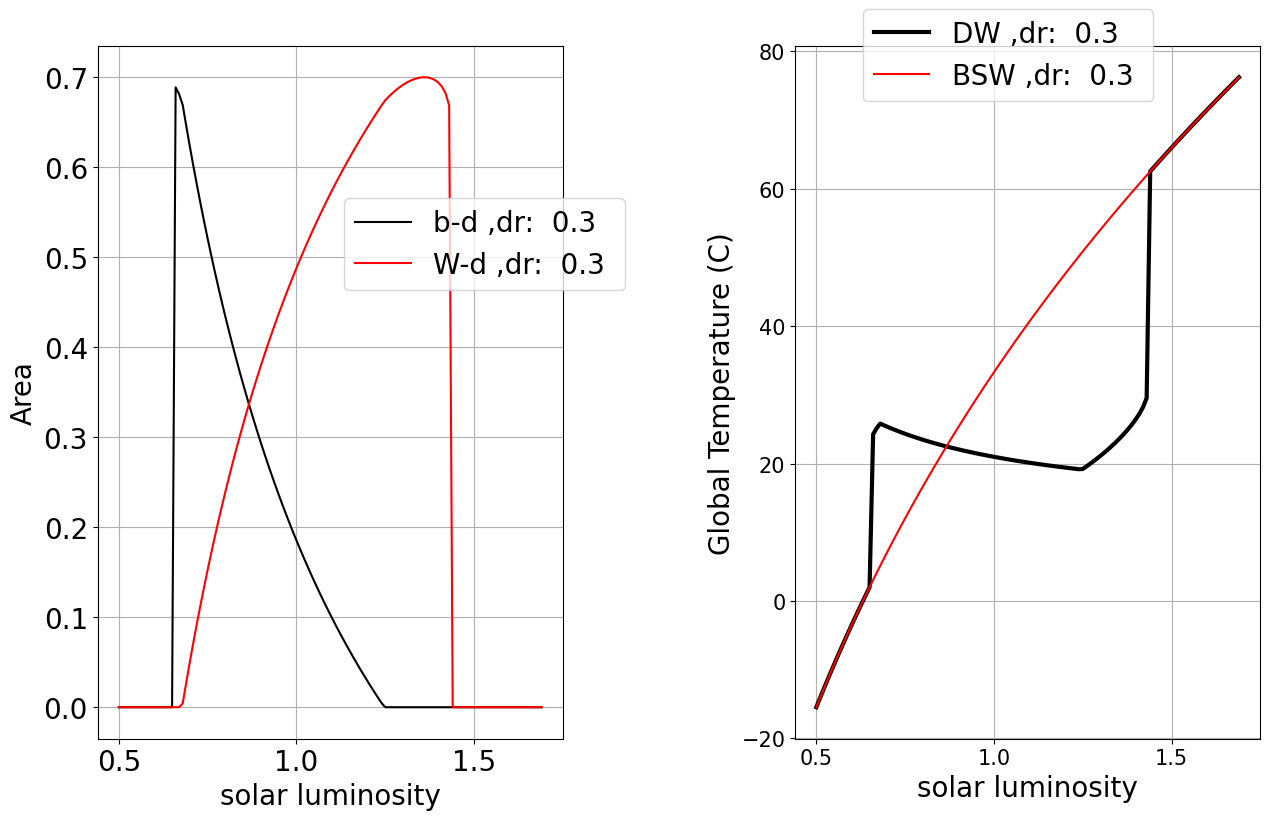

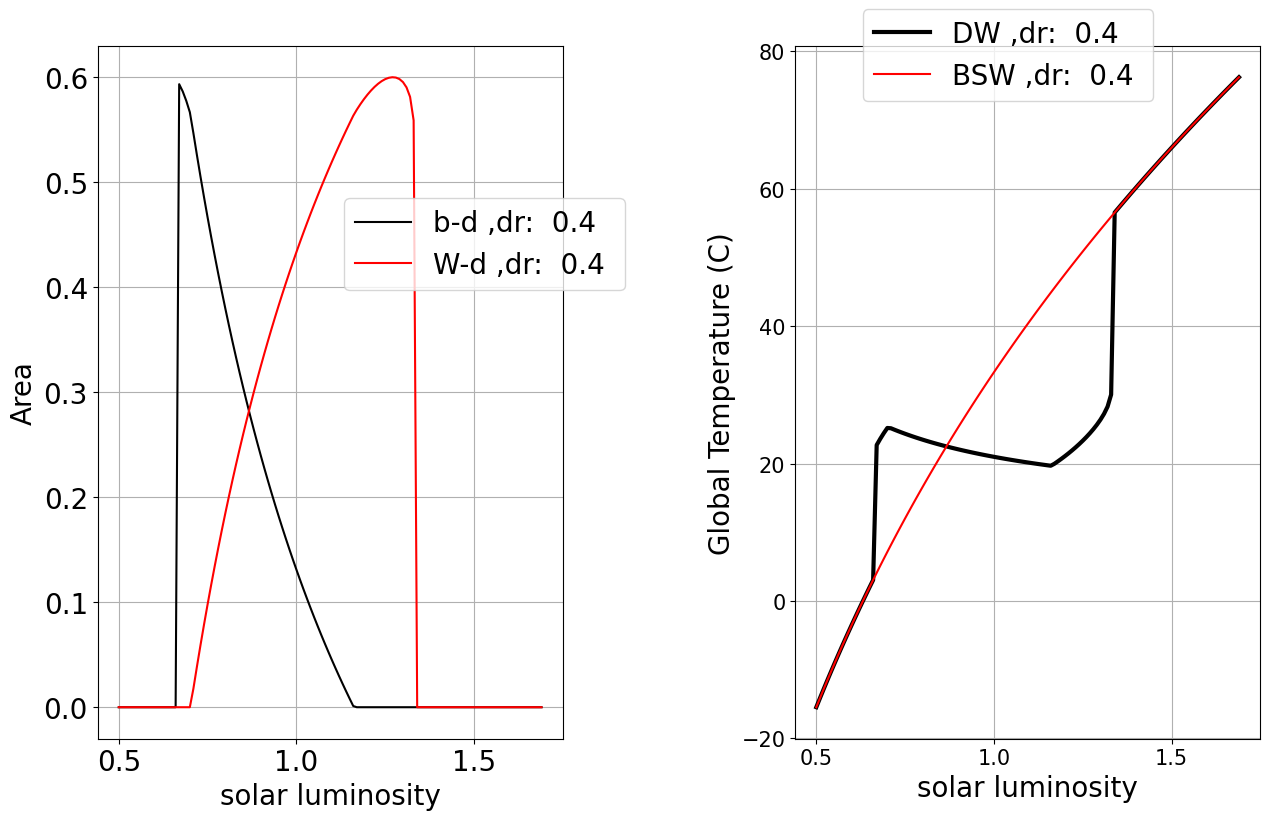

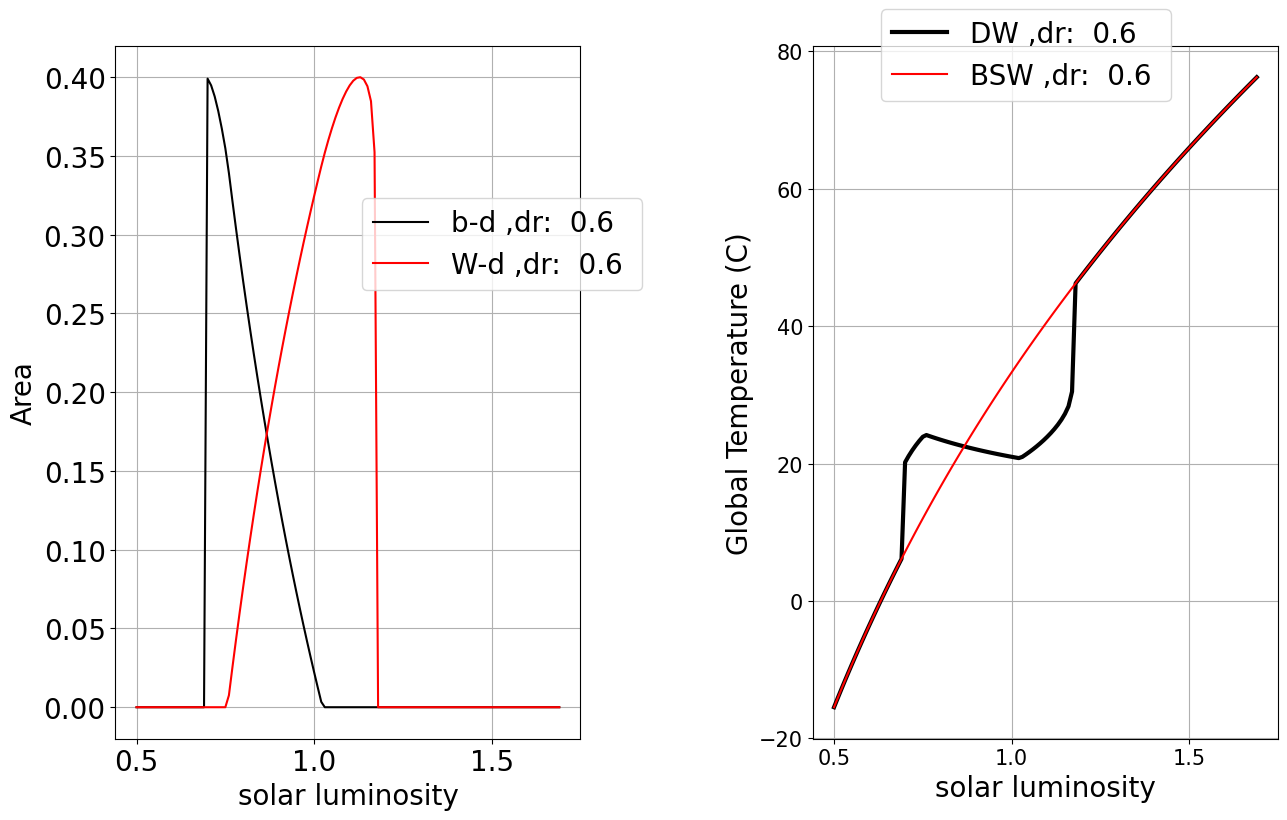

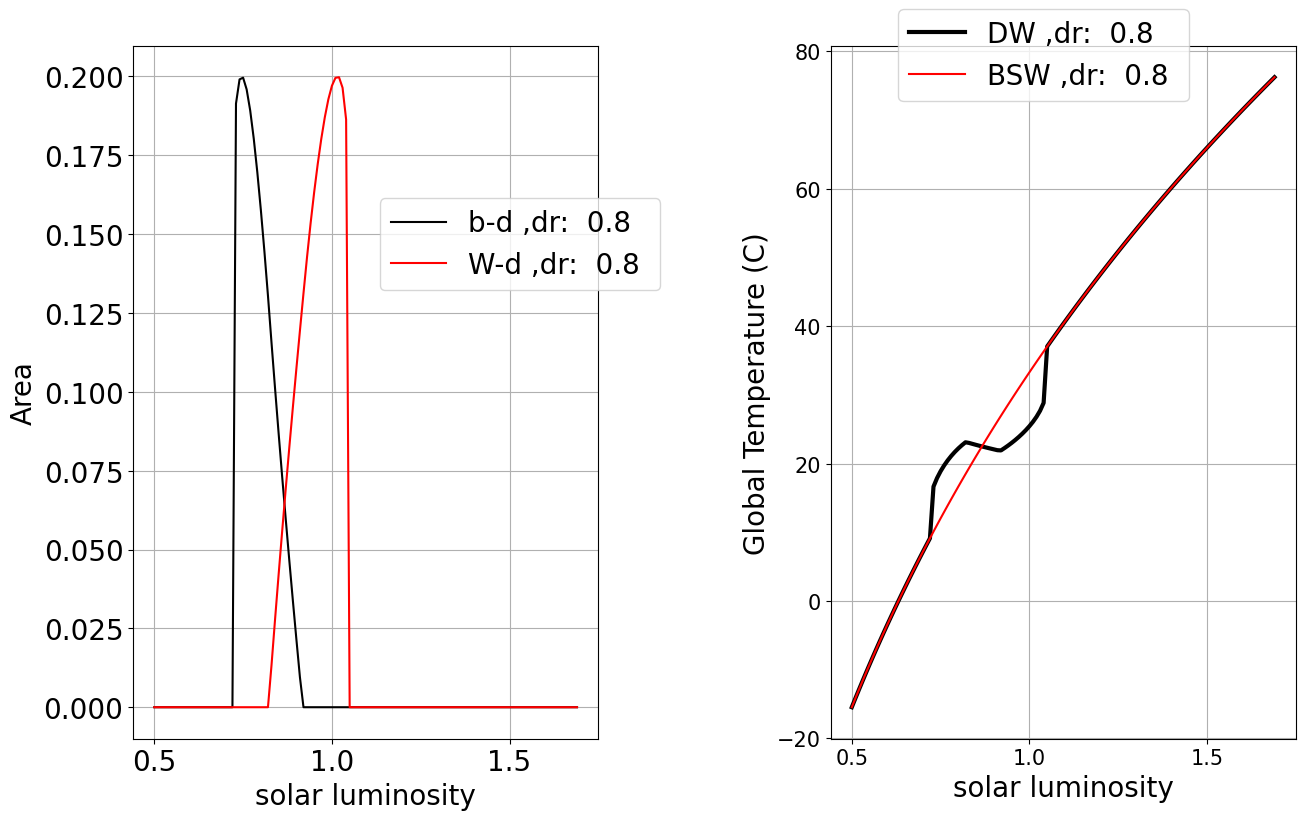

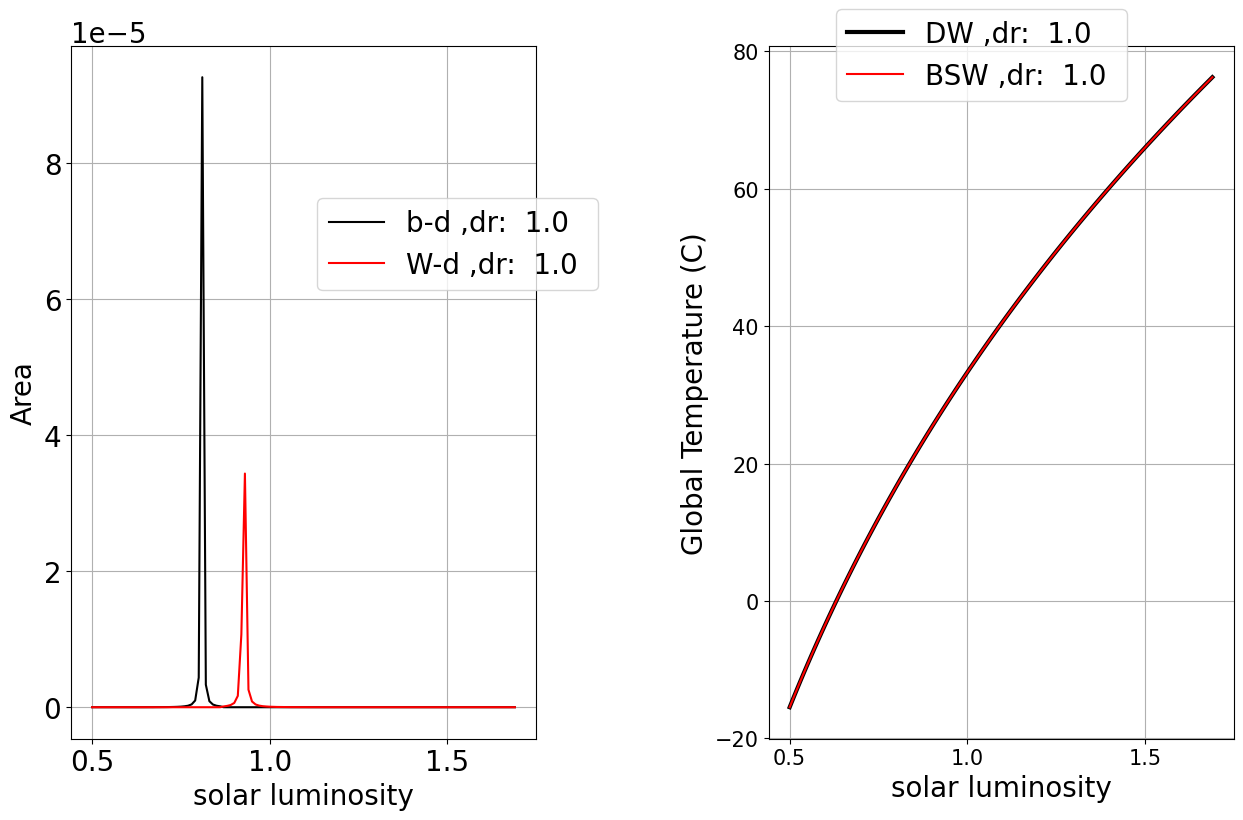

In [ ]:
alb_db,alb_bs,alb_dw =Albedo_modifier(alb_db=0.25,alb_bs=0.5,alb_dw=0.750)
# store arrays 
# alb_db=0.10
death_r=[0.,0.1,0.2,.3,0.4,0.6,0.8,1.]
for i in range(len(death_r)) :

  death_rate=death_rates(death_r[i])
  area_dw_v=[]
  area_db_v=[]
  area_bs_v=[]
  T_p_v=[]
  T_ref=[]

  area_dw=area_db=0.01 # initial conditions
  #luminosity=[1]

  # loop over luminosity...
  for iflux,flux in enumerate(luminosity):
      # initial conditions are taken from a previous run, subject to 
      # a minimum of 1% in case the species had died out 
      area_dw=max(area_dw,0.01)   # white daisies can't die out
      area_db=max(area_db,0.01)   # black daises neither  
      area_bs=1.0-area_dw-area_db # bare soil fraction
      delta_db=delta_dw=1
      
      iloop=0 
      
      while (abs(delta_db)+abs(delta_dw))>1.e-8:
          iloop+=1
          
          # EQN 5: calculate weighted average albedo
          alb_p=area_dw*alb_dw+area_db*alb_db+area_bs*alb_bs
          
          # EQN 4: calculate planet mean temperature
          T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
          
          # EQN 7: calculate local temperatures
          T_db=transport*(alb_p-alb_db)+T_p
          T_dw=transport*(alb_p-alb_dw)+T_p
          
          # EQN 3: calculate birth rate beta
          birth_rate_db=birth_rate(T_db)
          birth_rate_dw=birth_rate(T_dw)
            
          # EQN 1: change in daisy area
          delta_db=area_db*(birth_rate_db*area_bs-death_rate)
          delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
          area_db+=delta_db
          area_dw+=delta_dw
          
          # update areas
          area_bs=1.0-area_db-area_dw

          #print (area_db,area_dw,area_bs)
      
      # print (flux," converged after iteration ",iloop)
      # store the value...
      area_db_v.append(area_db)
      area_dw_v.append(area_dw)
      area_bs_v.append(area_bs)
      T_p_v.append(T_p)
      T_ref.append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))




  fig,ax=plt.subplots(1,2,figsize=(15,9))
  ax=ax.flatten()
  j=i
  
  ax[0].plot(luminosity,area_db_v,color='black',label="b-d ,dr:  %s "%death_r[i])
  # ax[0].plot(luminosity,Tobe_taken_db,c='g',label='b_before')
  ax[0].plot(luminosity,area_dw_v,color='red',label="W-d ,dr:  %s "%death_r[i])
  # ax[0].plot(luminosity,To_be_taken_dw,color='m',label='w_before')
  plt.yticks(fontsize=15)
  # changing the fontsize of xticks
  plt.xticks(fontsize=15)

  ax[0].set_xlabel('solar luminosity')
  ax[0].set_ylabel('Area')
  ax[0].grid('on')
  ax[0].legend(bbox_to_anchor=(0.5,0.8))
  plt.subplots_adjust(wspace=0.5,hspace=0.5)
  # ax[1].plot(luminosity,np.array(Tobe_taken_Tpv)-keloff,color="green",label="Daisy World_before :-)",linewidth=3)
  ax[1].plot(luminosity,np.array(T_p_v)-keloff,color="black",label="DW ,dr:  %s "%death_r[i],linewidth=3)
  ax[1].plot(luminosity,np.array(T_ref)-keloff,color="red",label="BSW ,dr:  %s "%death_r[i])
  # ax[1].plot(luminosity,np.array(Tobe_taken_Tref)-keloff,color="m",label="Bare Soil World_before :-(")
  ax[1].set_xlabel('solar luminosity')
  ax[1].set_ylabel('Global Temperature (C)')
  ax[1].grid()
  plt.yticks(fontsize=15)
  # changing the fontsize of xticks
  plt.xticks(fontsize=15)
  ax[1].legend(bbox_to_anchor=(0.8,0.9))
  # plt.pause(0.5)
  plt.savefig('death_albedo_%s.jpeg'%i,dpi=400)
plt.show()



# The population considered is about $1.\%$

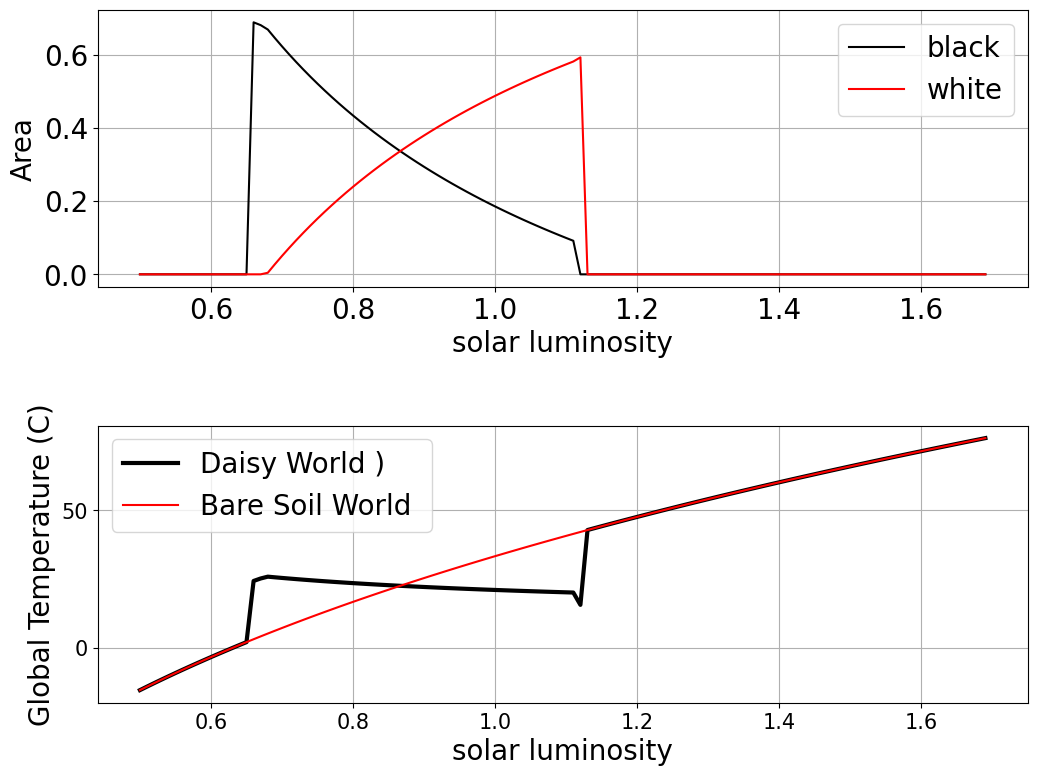

In [ ]:
alb_db,alb_bs,alb_dw =Albedo_modifier(alb_db=0.25,alb_bs=0.5,alb_dw=0.750)
# store arrays 
# alb_db=0.10
# for value in range(0,20):
value=0.30
death_rate=death_rates(value)
area_dw_v=[]
area_db_v=[]
area_bs_v=[]
T_p_v=[]
T_ref=[]

area_dw=area_db=0.01 # initial conditions

#luminosity=[1]

# loop over luminosity...
for iflux,flux in enumerate(luminosity):
    # initial conditions are taken from a previous run, subject to 
    # a minimum of 1% in case the species had died out 
    area_dw=0.01   # white daisies can't die out
    area_db=0.01   # black daises neither  
    area_bs=1.0-area_dw-area_db # bare soil fraction
    delta_db=delta_dw=1
    
    iloop=0 
    
    while (abs(delta_db)+abs(delta_dw))>1.e-8:
        iloop+=1
        
        # EQN 5: calculate weighted average albedo
        alb_p=area_dw*alb_dw+area_db*alb_db+area_bs*alb_bs
        
        # EQN 4: calculate planet mean temperature
        T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
        
        # EQN 7: calculate local temperatures
        T_db=transport*(alb_p-alb_db)+T_p
        T_dw=transport*(alb_p-alb_dw)+T_p
        
        # EQN 3: calculate birth rate beta
        birth_rate_db=birth_rate(T_db)
        birth_rate_dw=birth_rate(T_dw)
          
        # EQN 1: change in daisy area
        delta_db=area_db*(birth_rate_db*area_bs-death_rate)
        delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
        area_db+=delta_db
        area_dw+=delta_dw
        
        # update areas
        area_bs=1.0-area_db-area_dw

        #print (area_db,area_dw,area_bs)
    
    # print (flux," converged after iteration ",iloop)
    # store the value...
    area_db_v.append(area_db)
    area_dw_v.append(area_dw)
    area_bs_v.append(area_bs)
    T_p_v.append(T_p)
    T_ref.append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))




fig,ax=plt.subplots(2,1,figsize=(12,9))
ax[0].plot(luminosity,area_db_v,color='black',label='black')
# ax[0].plot(luminosity,Tobe_taken_db,c='g',label='b_before')
ax[0].plot(luminosity,area_dw_v,color='red',label='white')
# ax[0].plot(luminosity,To_be_taken_dw,color='m',label='w_before')
plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)
ax[0].set_xlabel('solar luminosity')
ax[0].set_ylabel('Area')
ax[0].grid('on')
ax[0].legend(bbox_to_anchor=(1.,0.9))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
# ax[1].plot(luminosity,np.array(Tobe_taken_Tpv)-keloff,color="green",label="Daisy World_before :-)",linewidth=3)
ax[1].plot(luminosity,np.array(T_p_v)-keloff,color="black",label="Daisy World )",linewidth=3)
ax[1].plot(luminosity,np.array(T_ref)-keloff,color="red",label="Bare Soil World ")
# ax[1].plot(luminosity,np.array(Tobe_taken_Tref)-keloff,color="m",label="Bare Soil World_before :-(")
ax[1].set_xlabel('solar luminosity')
ax[1].set_ylabel('Global Temperature (C)')
ax[1].grid()
plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)
ax[1].legend(bbox_to_anchor=(1.,0.9))
# plt.pause(0.5)
plt.savefig('consider_1_per_cent.jpeg',dpi=400)
plt.show()



# By introducing the cloud in the model

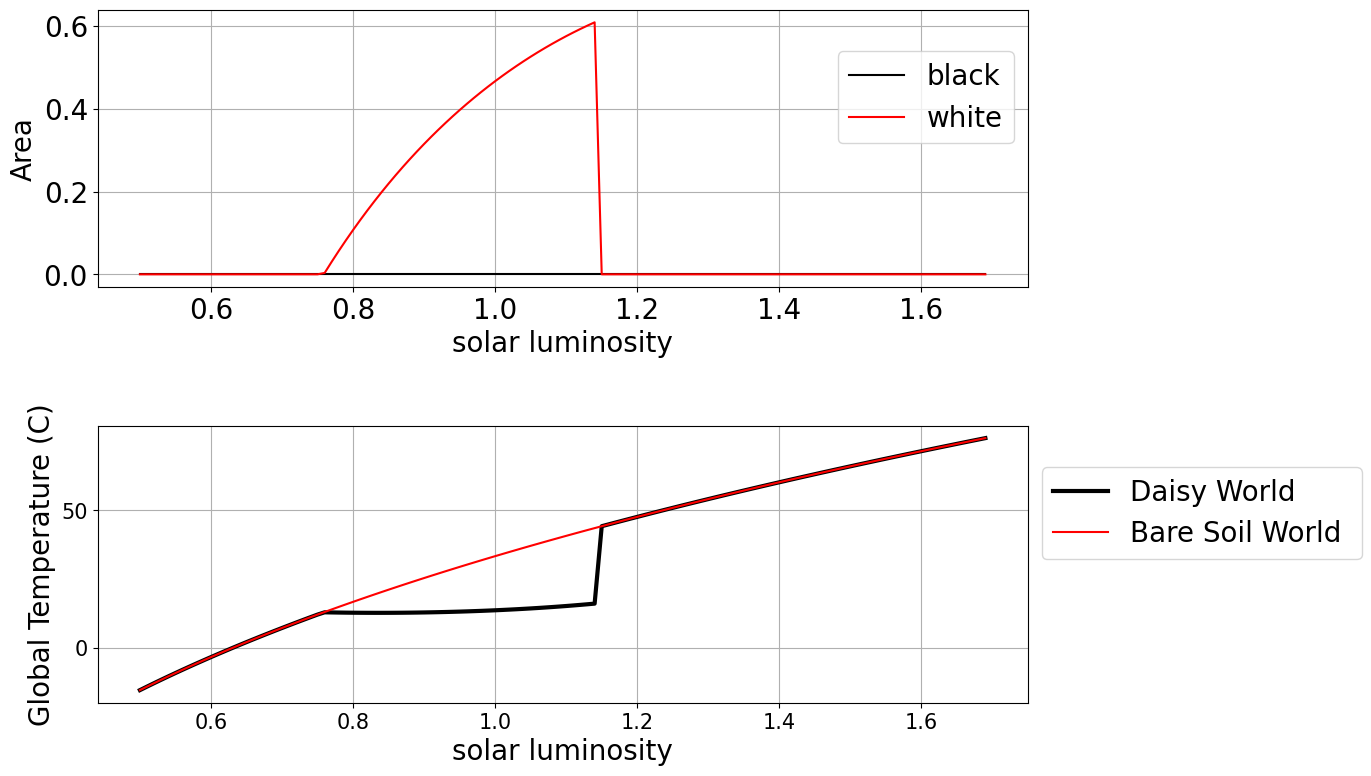

In [ ]:
alb_db,alb_bs,alb_dw =Albedo_modifier(alb_db=0.80,alb_bs=0.5,alb_dw=0.750)
# store arrays 
# alb_db=0.10
# for value in range(0,20):
value=0.30
death_rate=death_rates(value)
area_dw_v=[]
area_db_v=[]
area_bs_v=[]
T_p_v=[]
T_ref=[]

area_dw=area_db=0.01 # initial conditions

#luminosity=[1]

# loop over luminosity...
for iflux,flux in enumerate(luminosity):
    # initial conditions are taken from a previous run, subject to 
    # a minimum of 1% in case the species had died out 
    area_dw=max(0.01*area_dw,0.01)   # white daisies can't die out
    area_db=max(0.01*area_db,0.01)   # black daises neither  
    area_bs=1.0-area_dw-area_db # bare soil fraction
    delta_db=delta_dw=1
    
    iloop=0 
    
    while (abs(delta_db)+abs(delta_dw))>1.e-8:
        iloop+=1
        
        # EQN 5: calculate weighted average albedo
        alb_p=area_dw*alb_dw+area_db*alb_db+area_bs*alb_bs
        
        # EQN 4: calculate planet mean temperature
        T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
        
        # EQN 7: calculate local temperatures
        T_db=transport*(alb_p-alb_db)+T_p
        T_dw=transport*(alb_p-alb_dw)+T_p
        
        # EQN 3: calculate birth rate beta
        birth_rate_db=birth_rate(T_db)
        birth_rate_dw=birth_rate(T_dw)
          
        # EQN 1: change in daisy area
        delta_db=area_db*(birth_rate_db*area_bs-death_rate)
        delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
        area_db+=delta_db
        area_dw+=delta_dw
        
        # update areas
        area_bs=1.0-area_db-area_dw

        #print (area_db,area_dw,area_bs)
    
    # print (flux," converged after iteration ",iloop)
    # store the value...
    area_db_v.append(area_db)
    area_dw_v.append(area_dw)
    area_bs_v.append(area_bs)
    T_p_v.append(T_p)
    T_ref.append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))




fig,ax=plt.subplots(2,1,figsize=(12,9))
ax[0].plot(luminosity,area_db_v,color='black',label='black')
# ax[0].plot(luminosity,Tobe_taken_db,c='g',label='b_before')
ax[0].plot(luminosity,area_dw_v,color='red',label='white')
# ax[0].plot(luminosity,To_be_taken_dw,color='m',label='w_before')
plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)
ax[0].set_xlabel('solar luminosity')
ax[0].set_ylabel('Area')
ax[0].grid('on')
ax[0].legend(bbox_to_anchor=(1.,0.9))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
# ax[1].plot(luminosity,np.array(Tobe_taken_Tpv)-keloff,color="green",label="Daisy World_before :-)",linewidth=3)
ax[1].plot(luminosity,np.array(T_p_v)-keloff,color="black",label="Daisy World",linewidth=3)
ax[1].plot(luminosity,np.array(T_ref)-keloff,color="red",label="Bare Soil World ")
# ax[1].plot(luminosity,np.array(Tobe_taken_Tref)-keloff,color="m",label="Bare Soil World_before :-(")
ax[1].set_xlabel('solar luminosity')
ax[1].set_ylabel('Global Temperature (C)')
ax[1].grid()
ax[1].legend(bbox_to_anchor=(1.,0.9))
plt.yticks(fontsize=15)
# changing the fontsize of xticks
plt.xticks(fontsize=15)
# plt.pause(0.5)
plt.savefig('consider_cloud_0_8.jpeg',dpi=400)
plt.show()



We see the very interesting behaviour of daisy world.  Once the black daisies are established, they locally increase the temperature, and as the luminosity increases in also allows white daisies to be established. Increases in luminosity in turn increase the proportion of white daisies, which reduce the local temperature due to the higher albedo (note, higher than bare soil).  The key take home of WL83 was that, relative to bare soil world (red line) the temperature is very stable.  In fact you will see when you carry out some of the exercises below that the two daisies type are actually mutually beneficial in the standard set up of these model, that is "cooperative", and can coexist across a far wider range of luminosity than is the case when a single species exists.  This perhaps has important implications for the importance of biodiversity on our planet! 

In [ ]:

    
    # Initialize arrays to store data
  


# By changing the order of the albedo where $\alpha_{db}$

In [ ]:
 def Albedo_Initializer(state=''):
  if state.startswith('ad') and state.endswith('abs'):

    print('\n\n>>albedo of the white daisy is less than that of bare soil.\n\n')
 
    albedo_collection_BL_WH_BS=dict(alpha_db=0.25,alpha_dw=0.5,alpha_bs=0.75)
    return albedo_collection_BL_WH_BS

  elif state.startswith('abs') and state.endswith('adw'):

    print('\n\n>> The albedo of the bare soil is less than that of black daisy.\n\n')
    albedo_collection_BS_BL_WH=dict(alpha_bs=0.25,alpha_db=0.5,alpha_dw=0.75)

    return albedo_collection_BS_BL_WH
  else:
    print('\n>> The order of albedo didn\'t change\n\n')
    return dict(alpha_db=0.25,alpha_bs=0.50,alpha_dw=0.75)



def Plotter(luminosity,data,keloff):
  data_state1, data_state2, data_state3 = data[0], data[1],data[2] #Unpack the data based on the state of the albedo order
  area_db_v=data_state1['area_db_v']

  area_dw_v= data_state2['area_dw_v']

  fig,ax=plt.subplots(3,2,figsize=(15,13))
  ax=ax.flatten()
  plt.subplots_adjust(wspace=.5,hspace=0.5)
  ax[0].plot(luminosity,data_state1['area_db_v'],color='black',label='black')
  ax[0].plot(luminosity,data_state1['area_dw_v'],color='red',label='white')
  ax[0].set_xlabel('solar luminosity')
  ax[0].set_ylabel('Area')
  # ax[0].set_title(r'Once $A_{db}<A_{bs}<A_{dw}$')
  plt.yticks(fontsize=15)
# changing the fontsize of xticks
  plt.xticks(fontsize=15)
  ax[0].grid('on')
  ax[0].legend(bbox_to_anchor=(0.8,0.9))

  
  plt.subplots_adjust(wspace=.5,hspace=0.5)
  ax[1].plot(luminosity,np.array(data_state1['T_p_v'])-keloff,color="black",label="Daisy World ",linewidth=3)
  ax[1].plot(luminosity,np.array(data_state1['T_ref'])-keloff,color="red",label="Bare Soil World ")
  ax[1].set_xlabel('solar luminosity')
  ax[1].set_ylabel('Global Temperature (C)')
  # ax[1].set_title(r'Once $A_{db}<A_{bs}<A_{dw}$')
  plt.yticks(fontsize=15)
# changing the fontsize of xticks
  plt.xticks(fontsize=15)
  ax[1].grid()
  ax[1].legend(bbox_to_anchor=(0.8,0.9))

  plt.subplots_adjust(wspace=.5,hspace=0.5)
  ax[2].plot(luminosity,data_state2['area_db_v'],color='black',label='black')
  ax[2].plot(luminosity,data_state2['area_dw_v'],color='red',label='white')
  ax[2].set_xlabel('solar luminosity')
  ax[2].set_ylabel('Area')
  # ax[2].set_title(r'Once $A_{db}<A_{dw}<A_{bs}$')
  ax[2].grid('on')
  plt.yticks(fontsize=15)
# changing the fontsize of xticks
  plt.xticks(fontsize=15)
  # ax[2].legend(bbox_to_anchor=(1.,0.9))

  
  plt.subplots_adjust(wspace=.5,hspace=0.5)
  ax[3].plot(luminosity,np.array(data_state2['T_p_v'])-keloff,color="black",label="Daisy World ",linewidth=3)
  ax[3].plot(luminosity,np.array(data_state2['T_ref'])-keloff,color="red",label="Bare Soil World")
  ax[3].set_xlabel('solar luminosity')
  ax[3].set_ylabel('Global Temperature (C)')
  # ax[3].set_title(r'Once $A_{db}<A_{dw}<A_{bs}$')
  ax[3].grid()
  plt.yticks(fontsize=15)
# changing the fontsize of xticks
  plt.xticks(fontsize=15)
  # ax[3].legend(bbox_to_anchor=(1.,0.9))

  plt.subplots_adjust(wspace=.5,hspace=0.5)
  ax[4].plot(luminosity,data_state3['area_db_v'],color='black',label='black')
  ax[4].plot(luminosity,data_state3['area_dw_v'],color='red',label='white')
  ax[4].set_xlabel('solar luminosity')
  ax[4].set_ylabel('Area')
  ax[4].grid('on')
  plt.yticks(fontsize=15)
# changing the fontsize of xticks
  plt.xticks(fontsize=15)
  # ax[4].set_title(r'Once $A_{bs}<A_{db}<A_{dw}$')
  # ax[4].legend(bbox_to_anchor=(1.,0.9))

  
  plt.subplots_adjust(wspace=.5,hspace=0.5)
  ax[5].plot(luminosity,np.array(data_state3['T_p_v'])-keloff,color="black",label="Daisy World ",linewidth=3)
  ax[5].plot(luminosity,np.array(data_state3['T_ref'])-keloff,color="red")
  ax[5].set_xlabel('solar luminosity')
  ax[5].set_ylabel('Global Temperature (C)')
  ax[5].grid()
  plt.yticks(fontsize=15)
# changing the fontsize of xticks
  plt.xticks(fontsize=15)
  # ax[5].set_title(r'Once $A_{bs}<A_{db}<A_{dw}$')
  # ax[5].legend(bbox_to_anchor=(1.,0.9))
  plt.savefig('Order_change_albedo.jpg',dpi=400)
  plt.show()

In [ ]:
state=['','adabs','absadw']


In [ ]:
def death_rates(a=0.3):
  return a

In [ ]:
print(Albedo_Initializer())

value_store_per_state={}

for index,i_state in enumerate(state):
  albedo_values=Albedo_Initializer(i_state)

  alb_dw,alb_bs,alb_db=albedo_values['alpha_dw'],albedo_values['alpha_bs'],albedo_values['alpha_db']

  area_store=dict(area_dw_v=[],area_db_v=[],area_bs_v=[],T_p_v=[],T_ref=[])




  area_dw=area_db=0.01 # initial conditions

  #luminosity=[1]

  # loop over luminosity...
  for iflux,flux in enumerate(luminosity):
      # initial conditions are taken from a previous run, subject to 
      # a minimum of 1% in case the species had died out 
      area_dw=max(area_dw,0.01)   # white daisies can't die out
      area_db=max(area_db,0.01)   # black daises neither  
      area_bs=1.0-area_dw-area_db # bare soil fraction
      delta_db=delta_dw=1
      
      iloop=0 
      
      while (abs(delta_db)+abs(delta_dw))>1.e-8:
          iloop+=1
          
          # EQN 5: calculate weighted average albedo
          alb_p=area_dw*alb_dw+area_db*alb_db+area_bs*alb_bs
          
          # EQN 4: calculate planet mean temperature
          T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
          
          # EQN 7: calculate local temperatures
          T_db=transport*(alb_p-alb_db)+T_p
          T_dw=transport*(alb_p-alb_dw)+T_p
          
          # EQN 3: calculate birth rate beta
          birth_rate_db=birth_rate(T_db)
          birth_rate_dw=birth_rate(T_dw)
            
          # EQN 1: change in daisy area
          delta_db=area_db*(birth_rate_db*area_bs-death_rate)
          delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
          area_db+=delta_db
          area_dw+=delta_dw
          
          # update areas
          area_bs=1.0-area_db-area_dw

          #print (area_db,area_dw,area_bs)
      
      # print (flux," converged after iteration ",iloop)

      # store the value...
      area_store['area_db_v'].append(area_db)
      area_store['area_dw_v'].append(area_dw)
      area_store['area_bs_v'].append(area_bs)

      area_store['T_p_v'].append(T_p)
      area_store['T_ref'].append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))
  value_store_per_state[index]=area_store

  



>> The order of albedo didn't change


{'alpha_db': 0.25, 'alpha_bs': 0.5, 'alpha_dw': 0.75}

>> The order of albedo didn't change




>>albedo of the white daisy is less than that of bare soil.




>> The albedo of the bare soil is less than that of black daisy.




In [ ]:
value_store_per_state.keys()

dict_keys([0, 1, 2])

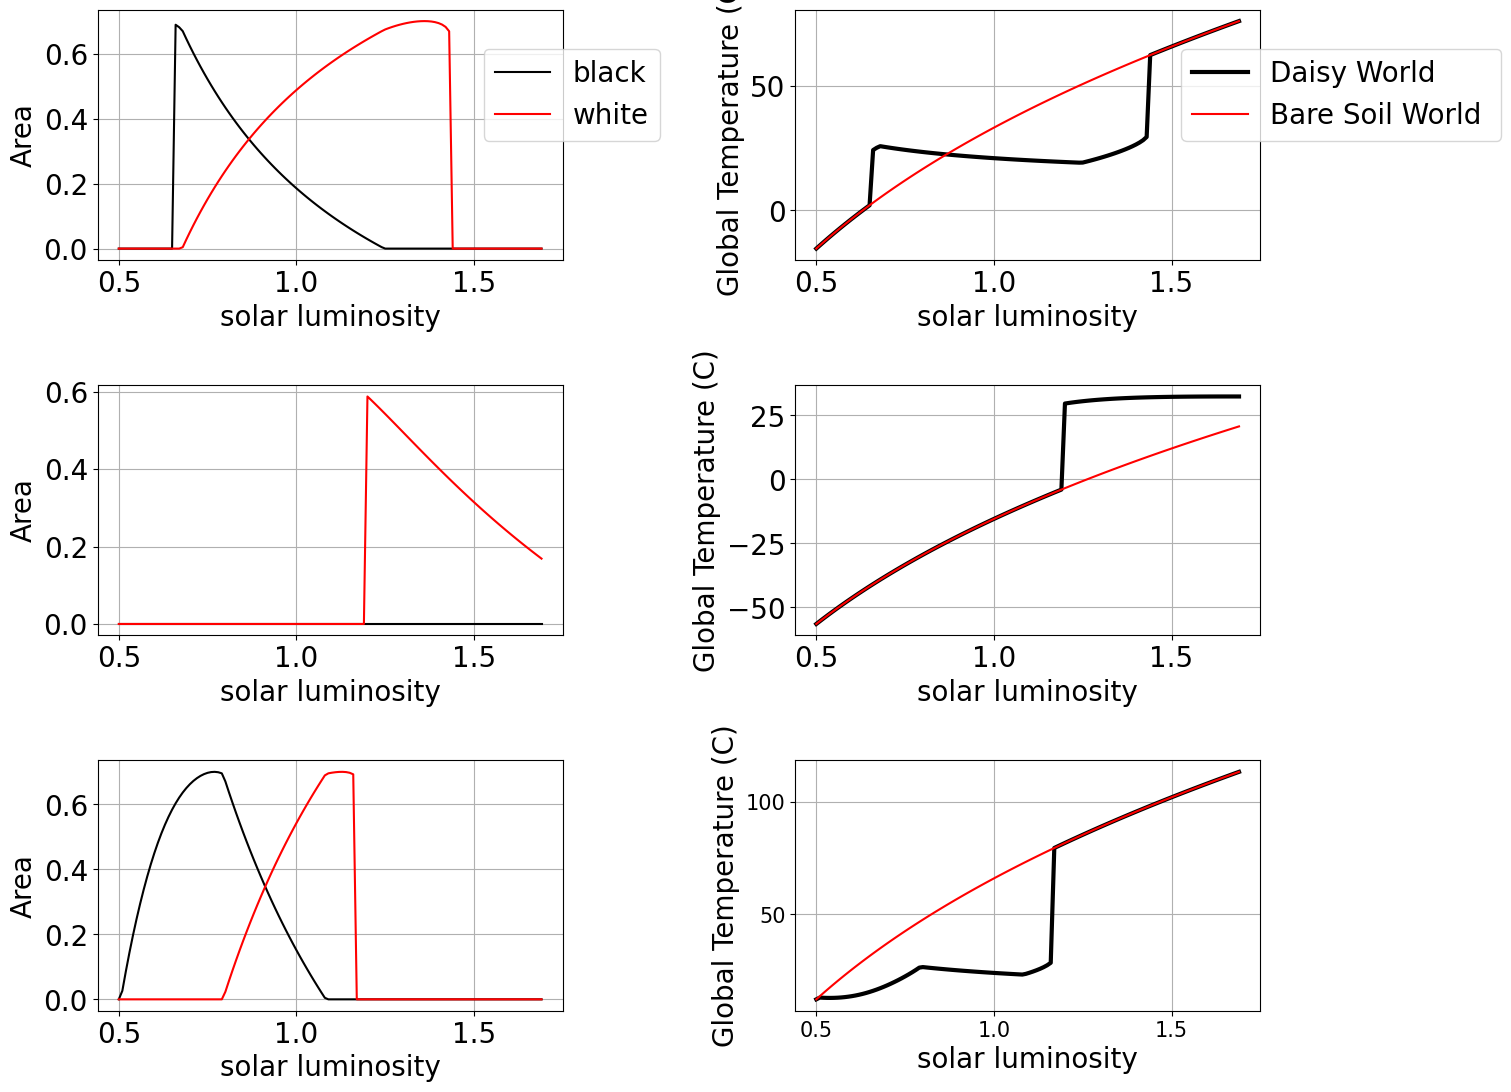

In [ ]:
data=value_store_per_state
Plotter(luminosity,data,keloff)

#4. By staying with one daisy type 

In [ ]:
def Albedo_Initializer(state=''):
  if state.startswith('ad') and state.endswith('abs'):

    print('\n\n>>albedo of the white daisy is less than that of bare soil.\n\n')
 
    albedo_collection_BL_WH_BS=dict(alpha_db=0.25,alpha_dw=0.5,alpha_bs=0.75)
    return albedo_collection_BL_WH_BS

  elif state.startswith('abs') and state.endswith('adw'):

    print('\n\n>> The albedo of the bare soil is less than that of black daisy.\n\n')
    albedo_collection_BS_BL_WH=dict(alpha_bs=0.25,alpha_db=0.5,alpha_dw=0.75)

    return albedo_collection_BS_BL_WH
  else:
    print('\n>> The order of albedo didn\'t change\n\n')
    return dict(alpha_db=0.25,alpha_bs=0.50,alpha_dw=0.75)



def Plotter(luminosity,data,keloff):
  data_state1, data_state2, data_state3 = data[0], data[1],data[2] #Unpack the data based on the state of the albedo order
  area_db_v=data_state1['area_db_v']

  area_dw_v= data_state2['area_dw_v']

  fig,ax=plt.subplots(3,2,figsize=(15,13))
  ax=ax.flatten()
  plt.subplots_adjust(wspace=.5,hspace=0.5)
  ax[0].plot(luminosity,data_state1['area_db_v'],color='black',label='black')
  ax[0].plot(luminosity,data_state1['area_dw_v'],color='red',label='white')
  ax[0].set_xlabel('solar luminosity')
  ax[0].set_ylabel('Area')
  # ax[0].set_title(r'Once $A_{db}<A_{bs}<A_{dw}$')
  ax[0].grid('on')
  plt.yticks(fontsize=15)
# changing the fontsize of xticks
  plt.xticks(fontsize=15)
  ax[0].legend(bbox_to_anchor=(0.8,0.8))

  
  plt.subplots_adjust(wspace=.5,hspace=0.5)
  ax[1].plot(luminosity,np.array(data_state1['T_p_v'])-keloff,color="black",label="Daisy World ",linewidth=3)
  ax[1].plot(luminosity,np.array(data_state1['T_ref'])-keloff,color="red",label="Bare Soil World ")
  ax[1].set_xlabel('solar luminosity')
  ax[1].set_ylabel('Global Temperature (C)')
  # ax[1].set_title(r'Once $A_{db}<A_{bs}<A_{dw}$')
  ax[1].grid()
  ax[1].legend(bbox_to_anchor=(0.8,0.8))
  plt.yticks(fontsize=15)
# changing the fontsize of xticks
  plt.xticks(fontsize=15)
  plt.subplots_adjust(wspace=.8,hspace=0.8)
  ax[2].plot(luminosity,data_state2['area_db_v'],color='black',label='black')
  ax[2].plot(luminosity,data_state2['area_dw_v'],color='red',label='white')
  ax[2].set_xlabel('solar luminosity')
  ax[2].set_ylabel('Area')
  # ax[2].set_title(r'Once $A_{db}<A_{dw}<A_{bs}$')
  ax[2].grid('on')
  ax[2].legend(bbox_to_anchor=(0.8,0.8))

  plt.yticks(fontsize=15)
# changing the fontsize of xticks
  plt.xticks(fontsize=15)
  plt.subplots_adjust(wspace=.5,hspace=0.5)
  ax[3].plot(luminosity,np.array(data_state2['T_p_v'])-keloff,color="black",label="Daisy World ",linewidth=3)
  ax[3].plot(luminosity,np.array(data_state2['T_ref'])-keloff,color="red",label="Bare Soil World")
  ax[3].set_xlabel('solar luminosity')
  ax[3].set_ylabel('Global Temperature (C)')
  # ax[3].set_title(r'Once $A_{db}<A_{dw}<A_{bs}$')
  ax[3].grid()
  ax[3].legend(bbox_to_anchor=(0.8,0.8))
  plt.yticks(fontsize=15)
# changing the fontsize of xticks
  plt.xticks(fontsize=15)
  plt.subplots_adjust(wspace=.5,hspace=0.5)
  ax[4].plot(luminosity,data_state3['area_db_v'],color='black',label='black')
  ax[4].plot(luminosity,data_state3['area_dw_v'],color='red',label='white')
  ax[4].set_xlabel('solar luminosity')
  ax[4].set_ylabel('Area')
  ax[4].grid('on')
  # ax[4].set_title(r'Once $A_{bs}<A_{db}<A_{dw}$')
  ax[4].legend(bbox_to_anchor=(1.2,0.8))

  plt.yticks(fontsize=15)
# changing the fontsize of xticks
  plt.xticks(fontsize=15)
  plt.subplots_adjust(wspace=.5,hspace=0.5)
  ax[5].plot(luminosity,np.array(data_state3['T_p_v'])-keloff,color="black",label="Daisy World ",linewidth=3)
  ax[5].plot(luminosity,np.array(data_state3['T_ref'])-keloff,color="red",label="Bare Soil World ")
  ax[5].set_xlabel('solar luminosity')
  ax[5].set_ylabel('Global Temperature (C)')
  ax[5].grid()
  # ax[5].set_title(r'Once $A_{bs}<A_{db}<A_{dw}$')
  ax[5].legend(bbox_to_anchor=(0.8,0.8))
  plt.yticks(fontsize=15)
# changing the fontsize of xticks
  plt.xticks(fontsize=15)
  plt.savefig('Order_change_albedo_for_single_daisy.jpg',dpi=400)
  plt.show()

In [ ]:
def white_daisy_only(state,alb_black=0.25,area_db=0.01):

  value_store_per_state={}

  for index,i_state in enumerate(state):
    albedo_values=Albedo_Initializer(i_state)

    alb_dw,alb_bs,alb_db=albedo_values['alpha_dw'],albedo_values['alpha_bs'],albedo_values['alpha_db']
    alb_db=alb_black
    area_store=dict(area_dw_v=[],area_db_v=[],area_bs_v=[],T_p_v=[],T_ref=[])
    alb_dw=0.5




    area_dw=0.01 # initial conditions
    area_db=0.01

    #luminosity=[1]

    # loop over luminosity...
    for iflux,flux in enumerate(luminosity):
        # initial conditions are taken from a previous run, subject to 
        # a minimum of 1% in case the species had died out 
        area_dw=max(area_dw,0.01)   # white daisies can't die out
        area_db=area_db  # black daises neither  
        area_bs=1.0-area_dw-area_db # bare soil fraction
        delta_db=delta_dw=1
        
        iloop=0 
        
        while (abs(delta_db)+abs(delta_dw))>1.e-8:
            iloop+=1
            
            # EQN 5: calculate weighted average albedo
            alb_p=area_dw*alb_dw+area_db*alb_db+area_bs*alb_bs
            
            # EQN 4: calculate planet mean temperature
            T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
            
            # EQN 7: calculate local temperatures
            T_db=transport*(alb_p-alb_db)+T_p
            T_dw=transport*(alb_p-alb_dw)+T_p
            T_db=0.0
            
            # EQN 3: calculate birth rate beta
            birth_rate_db=birth_rate(T_db)
            birth_rate_dw=birth_rate(T_dw)
              
            # EQN 1: change in daisy area
            delta_db=area_db*(birth_rate_db*area_bs-death_rate)
            delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
            area_db+=delta_db
            area_dw+=delta_dw
            
            # update areas
            area_bs=1.0-area_db-area_dw

            #print (area_db,area_dw,area_bs)
        
        # print (flux," converged after iteration ",iloop)

        # store the value...
        area_store['area_db_v'].append(area_db)
        area_store['area_dw_v'].append(area_dw)
        area_store['area_bs_v'].append(area_bs)

        area_store['T_p_v'].append(T_p)
        area_store['T_ref'].append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))
    value_store_per_state[index]=area_store
  data=value_store_per_state
  Plotter(luminosity,data,keloff)
  






>> The order of albedo didn't change




>>albedo of the white daisy is less than that of bare soil.




>> The albedo of the bare soil is less than that of black daisy.




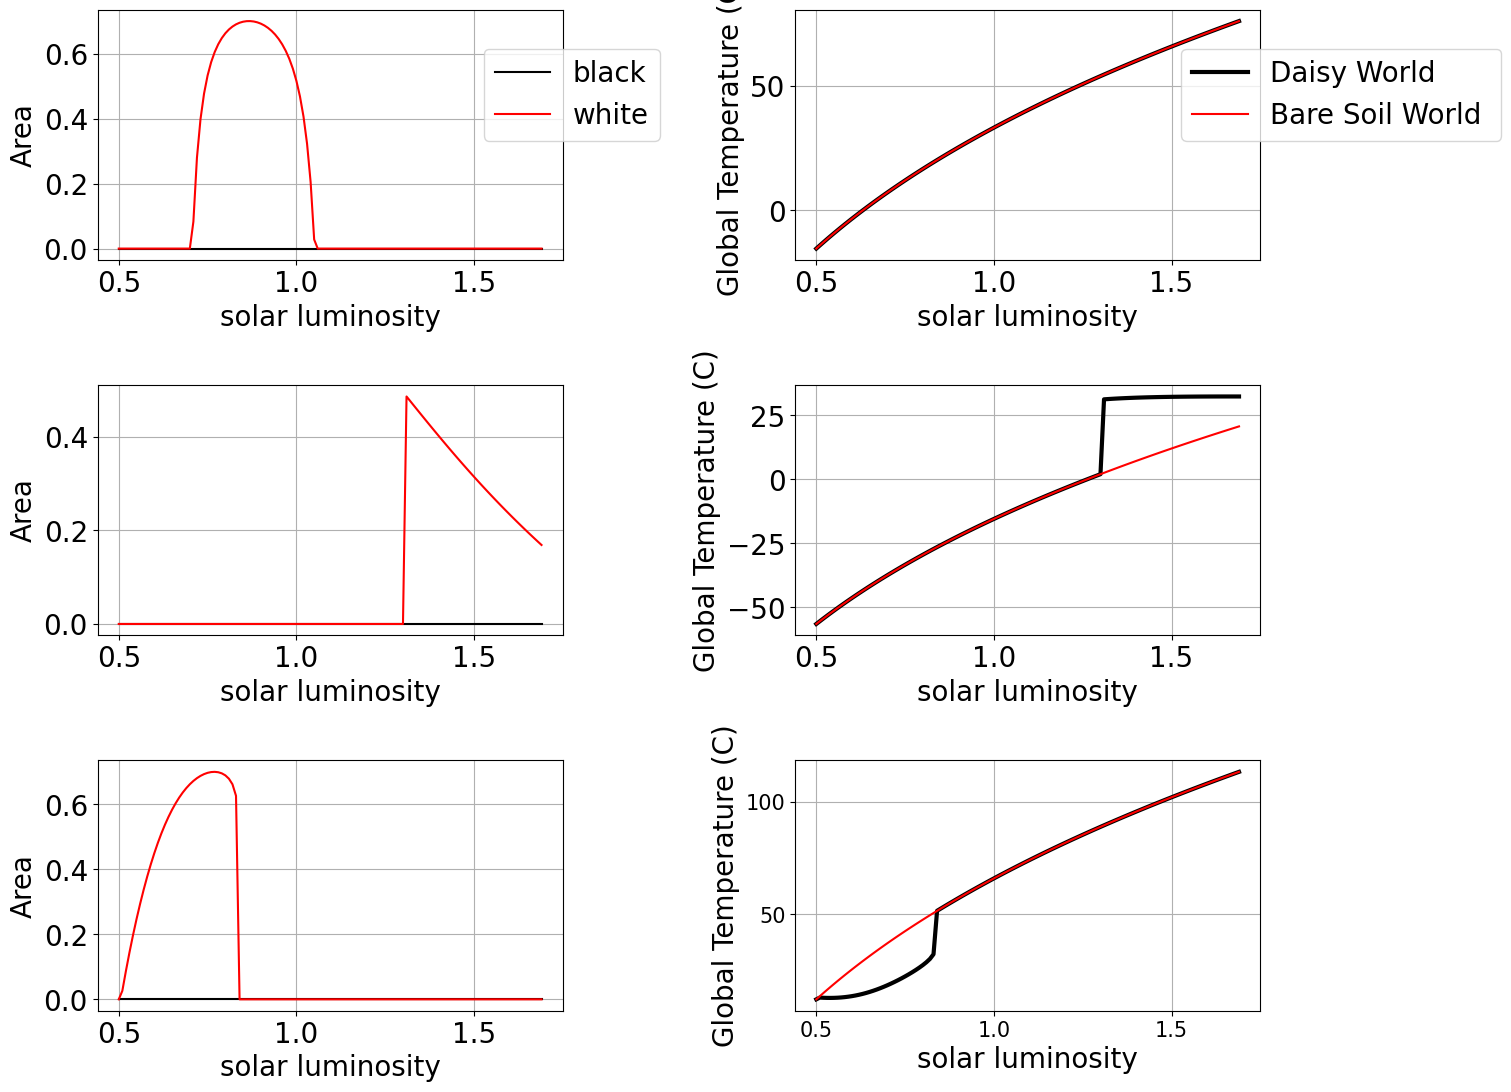

In [ ]:
white_daisy_only(state,alb_black=0.5,area_db=0)

# With only black daisy

In [ ]:
def black_daisy_only(state,alb_white=0.75,area_dw=0.01):

  value_store_per_state={}

  for index,i_state in enumerate(state):
    albedo_values=Albedo_Initializer(i_state)

    alb_dw,alb_bs,alb_db=albedo_values['alpha_dw'],albedo_values['alpha_bs'],albedo_values['alpha_db']
    alb_dw=alb_white
    area_store=dict(area_dw_v=[],area_db_v=[],area_bs_v=[],T_p_v=[],T_ref=[])


    alb_db=0.5

    area_db=0.01 # initial conditions

    #luminosity=[1]

    # loop over luminosity...
    for iflux,flux in enumerate(luminosity):
        # initial conditions are taken from a previous run, subject to 
        # a minimum of 1% in case the species had died out 
        area_dw=max(area_dw,0.01)   # white daisies can't die out
        area_db=area_dw  # black daises neither  
        area_bs=1.0-area_dw-area_db # bare soil fraction
        delta_db=delta_dw=1
        
        iloop=0 
        
        while (abs(delta_db)+abs(delta_dw))>1.e-8:
            iloop+=1
            
            # EQN 5: calculate weighted average albedo
            alb_p=area_dw*alb_dw+area_db*alb_db+area_bs*alb_bs
            
            # EQN 4: calculate planet mean temperature
            T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
            
            # EQN 7: calculate local temperatures
            T_db=transport*(alb_p-alb_db)+T_p
            T_dw=transport*(alb_p-alb_dw)+T_p
            T_dw=0.0
            
            # EQN 3: calculate birth rate beta
            birth_rate_db=birth_rate(T_db)
            birth_rate_dw=birth_rate(T_dw)
              
            # EQN 1: change in daisy area
            delta_db=area_db*(birth_rate_db*area_bs-death_rate)
            delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
            area_db+=delta_db
            area_dw+=delta_dw
            
            # update areas
            area_bs=1.0-area_db-area_dw

            #print (area_db,area_dw,area_bs)
        
        # print (flux," converged after iteration ",iloop)

        # store the value...
        area_store['area_db_v'].append(area_db)
        area_store['area_dw_v'].append(area_dw)
        area_store['area_bs_v'].append(area_bs)

        area_store['T_p_v'].append(T_p)
        area_store['T_ref'].append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))
    value_store_per_state[index]=area_store
  data=value_store_per_state
  Plotter(luminosity,data,keloff)
  






>> The order of albedo didn't change




>>albedo of the white daisy is less than that of bare soil.




>> The albedo of the bare soil is less than that of black daisy.




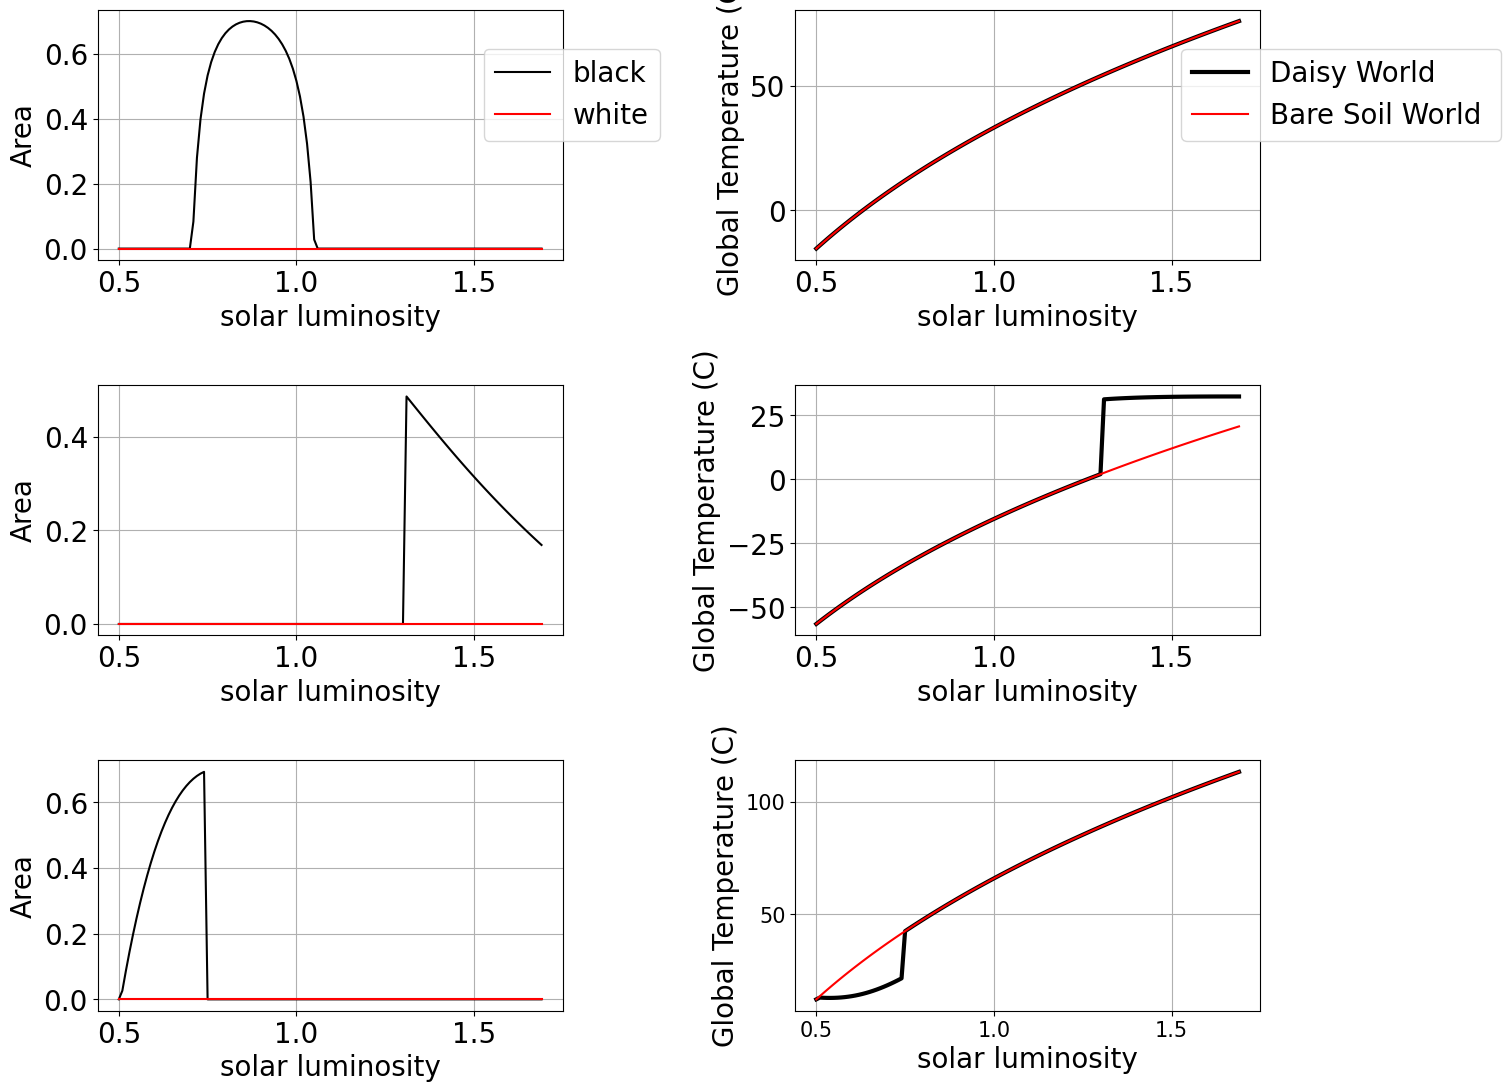

In [ ]:
black_daisy_only(state)

# With 3 types of daisies


>> The order of albedo didn't change


{'alpha_db': 0.25, 'alpha_bs': 0.5, 'alpha_dw': 0.75}

>> The order of albedo didn't change




120it [00:00, 247.08it/s]


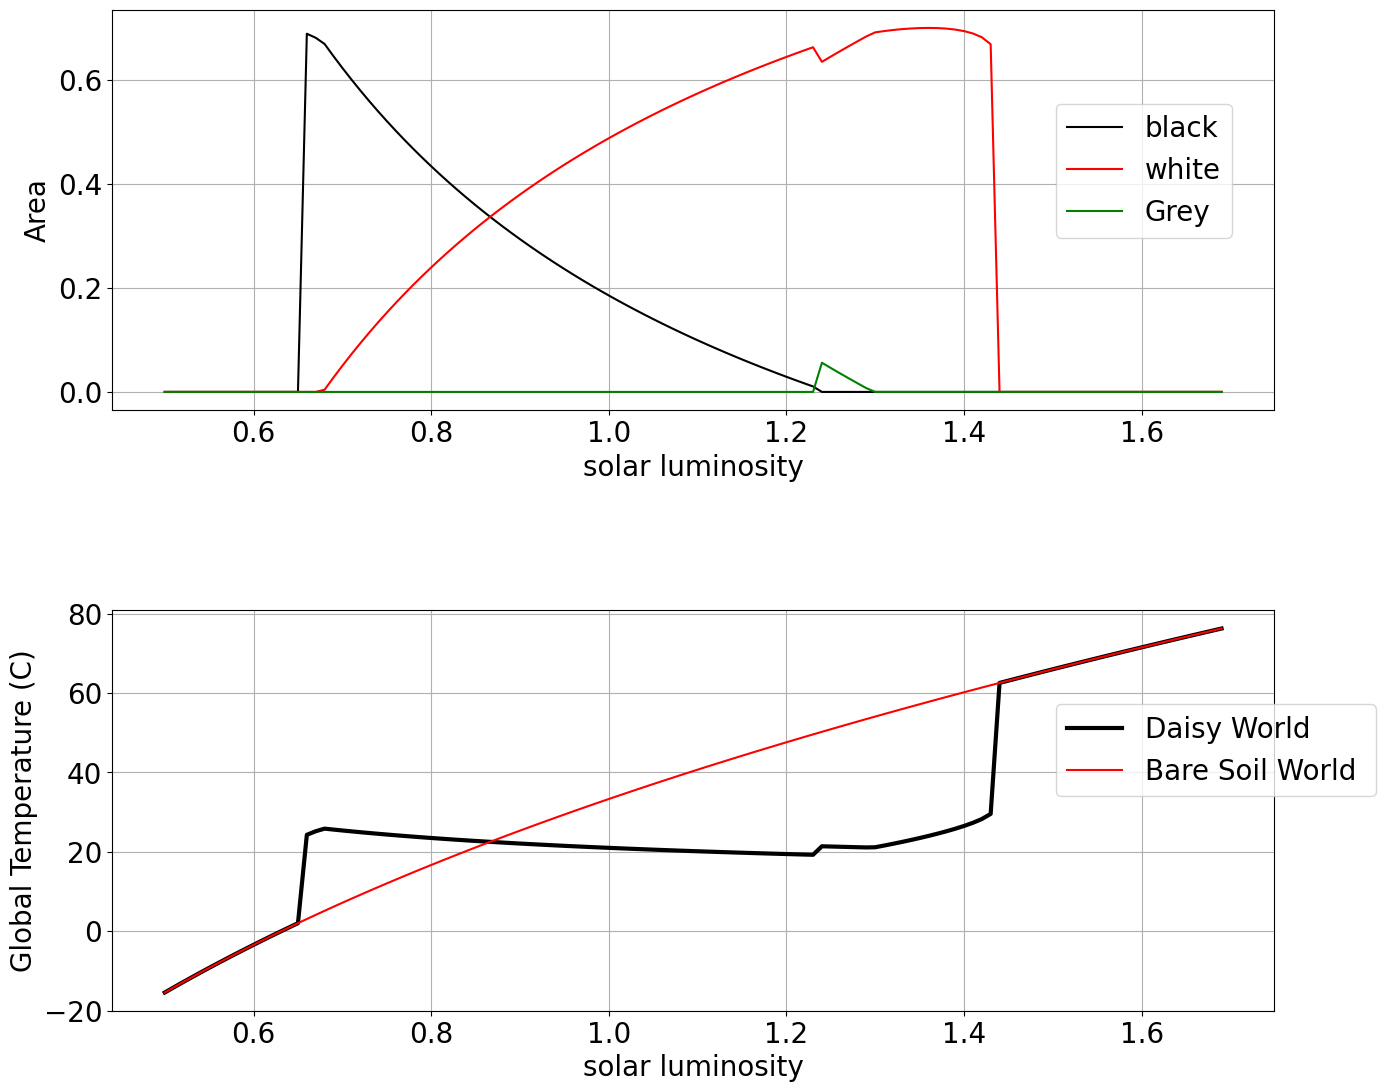

In [ ]:
print(Albedo_Initializer())
from tqdm import tqdm

value_store_per_state={}
alb_grey=0.45


albedo_values=Albedo_Initializer(state[0])

alb_dw,alb_bs,alb_db=0.75, 0.50, 0.25

area_store=dict(area_dw_v=[],area_db_v=[],area_dg_v=[],area_bs_v=[],T_p_v=[],T_ref=[])




area_dw=area_db=area_dg=0.01 # initial conditions

  #luminosity=[1]

# loop over luminosity...
for iflux,flux in tqdm(enumerate(luminosity)):
    # initial conditions are taken from a previous run, subject to 
    # a minimum of 1% in case the species had died out 
    area_dw=max(area_dw,0.01)   # white daisies can't die out
    area_db=max(area_db,0.01) # black daises neither 
    area_gd= max(area_dg,0.01)  #Grey daisies neither
    area_bs=1.0-area_dw-area_db-area_dg # bare soil fraction
    
    delta_db=delta_dw=delta_dg=1
    
    iloop=0 
    
    while (abs(delta_db)+abs(delta_dw))+abs(delta_dg)>1.e-8:
        iloop+=1
        
        # EQN 5: calculate weighted average albedo
        alb_p=area_dw*alb_dw+ area_db*alb_db + area_bs*alb_bs+area_dg*alb_grey
        
        # EQN 4: calculate planet mean temperature
        T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
        
        # EQN 7: calculate local temperatures
        T_db=transport*(alb_p-alb_db)+T_p
        T_dw=transport*(alb_p-alb_dw)+T_p
        T_dg=transport*(alb_p-alb_grey)+T_p
        
        # EQN 3: calculate birth rate beta
        birth_rate_db=birth_rate(T_db)
        birth_rate_dw=birth_rate(T_dw)
        birth_rate_dg=birth_rate(T_dg)
          
        # EQN 1: change in daisy area
        delta_db=area_db*(birth_rate_db*area_bs-death_rate)
        delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
        delta_dg=area_dg*(birth_rate_dg*area_bs-death_rate)

        area_db+=delta_db
        area_dw+=delta_dw
        area_dg+=delta_dg
        
        # update areas
        area_bs=1.0-area_db-area_dw-area_dg

        #print (area_db,area_dw,area_bs)
    
    # print (flux," converged after iteration ",iloop)

    # store the value...
    area_store['area_db_v'].append(area_db)
    area_store['area_dw_v'].append(area_dw)
    area_store['area_bs_v'].append(area_bs)
    area_store['area_dg_v'].append(area_dg)

    area_store['T_p_v'].append(T_p)
    area_store['T_ref'].append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))
value_store_per_state[0]=area_store


data_state1= value_store_per_state[0]#Unpack the data based on the state of the albedo order
area_db_v=data_state1['area_db_v']

area_dw_v= data_state1['area_dw_v']
area_dg_v= data_state1['area_dg_v']

fig,ax=plt.subplots(2,1,figsize=(15,13))
ax=ax.flatten()
plt.subplots_adjust(wspace=.5,hspace=0.5)
ax[0].plot(luminosity,data_state1['area_db_v'],color='black',label='black')
ax[0].plot(luminosity,data_state1['area_dw_v'],color='red',label='white')
ax[0].plot(luminosity,data_state1['area_dg_v'],color='green',label='Grey')
ax[0].set_xlabel('solar luminosity')
ax[0].set_ylabel('Area')
# ax[0].set_title(r'Once $A_{db}<A_{bs}<A_{dw}$')
ax[0].grid('on')
ax[0].legend(bbox_to_anchor=(0.8,0.8))


plt.subplots_adjust(wspace=.5,hspace=0.5)
ax[1].plot(luminosity,np.array(data_state1['T_p_v'])-keloff,color="black",label="Daisy World ",linewidth=3)
ax[1].plot(luminosity,np.array(data_state1['T_ref'])-keloff,color="red",label="Bare Soil World ")
ax[1].set_xlabel('solar luminosity')
ax[1].set_ylabel('Global Temperature (C)')
# ax[1].set_title(r'Once $A_{db}<A_{bs}<A_{dw}$')
ax[1].grid()
ax[1].legend(bbox_to_anchor=(0.8,0.8))

plt.savefig('Considering_more_daisies.jpg',dpi=400)
plt.show()
plt.ion()

# If Increase the albedo of the 3rd daisyworld


>> The order of albedo didn't change


{'alpha_db': 0.25, 'alpha_bs': 0.5, 'alpha_dw': 0.75}

>> The order of albedo didn't change




120it [00:00, 326.25it/s]


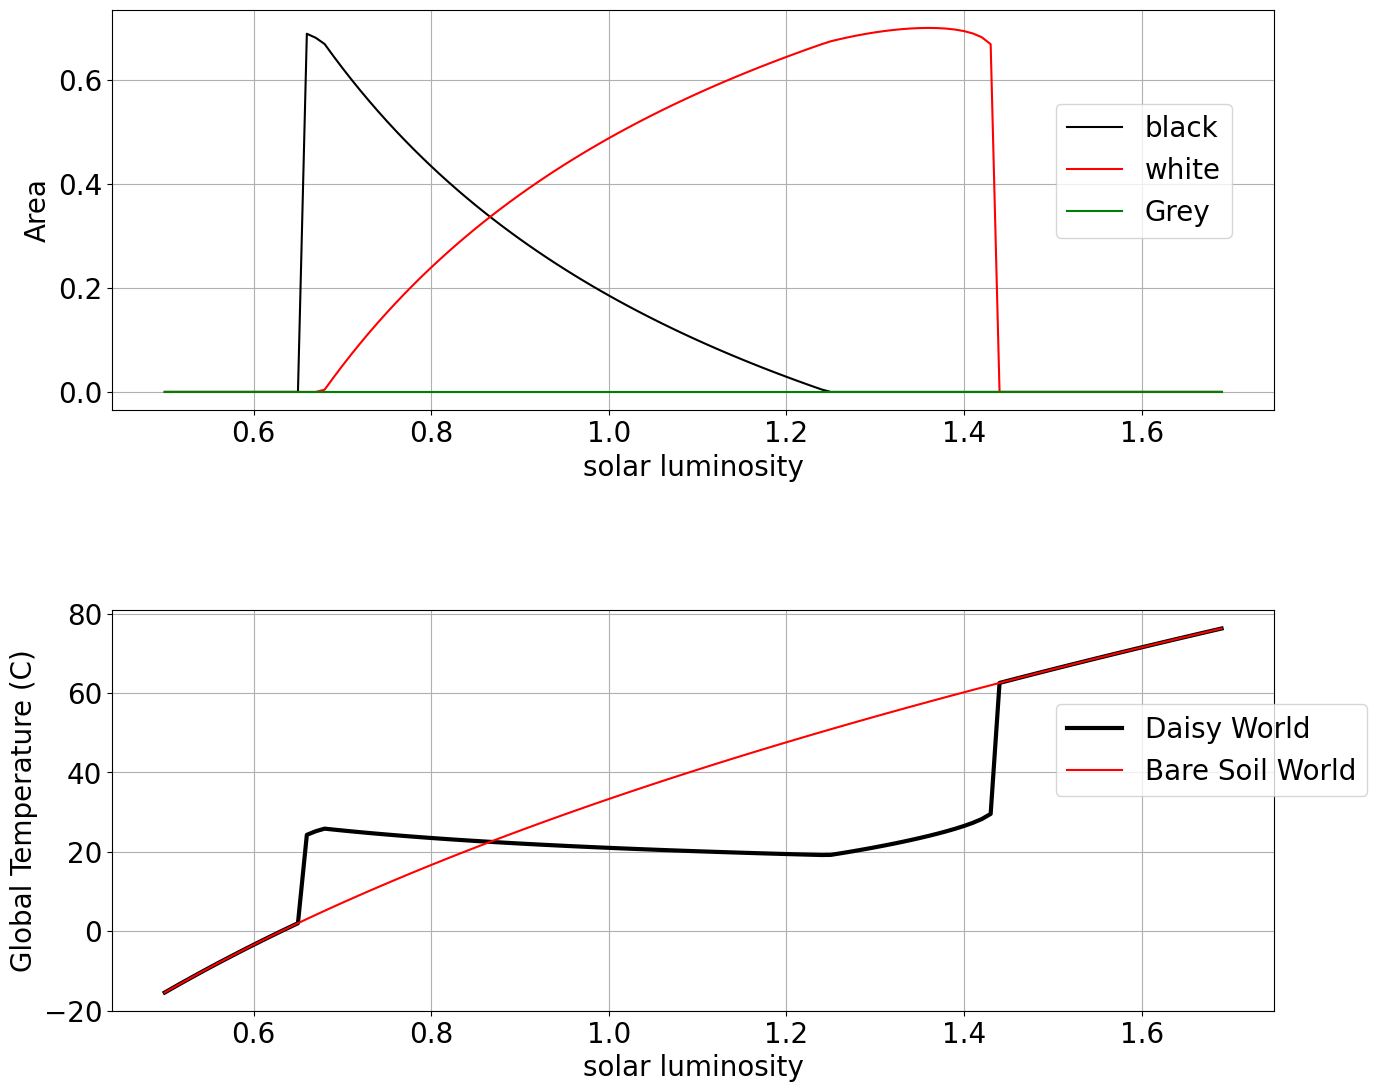

In [ ]:
print(Albedo_Initializer())
from tqdm import tqdm

value_store_per_state={}
alb_grey=0.65


albedo_values=Albedo_Initializer(state[0])

alb_dw,alb_bs,alb_db=0.75, 0.50, 0.25

area_store=dict(area_dw_v=[],area_db_v=[],area_dg_v=[],area_bs_v=[],T_p_v=[],T_ref=[])




area_dw=area_db=area_dg=0.01 # initial conditions

  #luminosity=[1]

# loop over luminosity...
for iflux,flux in tqdm(enumerate(luminosity)):
    # initial conditions are taken from a previous run, subject to 
    # a minimum of 1% in case the species had died out 
    area_dw=max(area_dw,0.01)   # white daisies can't die out
    area_db=max(area_db,0.01) # black daises neither 
    area_gd= max(area_dg,0.01)  #Grey daisies neither
    area_bs=1.0-area_dw-area_db-area_dg # bare soil fraction
    
    delta_db=delta_dw=delta_dg=1
    
    iloop=0 
    
    while (abs(delta_db)+abs(delta_dw))+abs(delta_dg)>1.e-8:
        iloop+=1
        
        # EQN 5: calculate weighted average albedo
        alb_p=area_dw*alb_dw+ area_db*alb_db + area_bs*alb_bs+area_dg*alb_grey
        
        # EQN 4: calculate planet mean temperature
        T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
        
        # EQN 7: calculate local temperatures
        T_db=transport*(alb_p-alb_db)+T_p
        T_dw=transport*(alb_p-alb_dw)+T_p
        T_dg=transport*(alb_p-alb_grey)+T_p
        
        # EQN 3: calculate birth rate beta
        birth_rate_db=birth_rate(T_db)
        birth_rate_dw=birth_rate(T_dw)
        birth_rate_dg=birth_rate(T_dg)
          
        # EQN 1: change in daisy area
        delta_db=area_db*(birth_rate_db*area_bs-death_rate)
        delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
        delta_dg=area_dg*(birth_rate_dg*area_bs-death_rate)

        area_db+=delta_db
        area_dw+=delta_dw
        area_dg+=delta_dg
        
        # update areas
        area_bs=1.0-area_db-area_dw-area_dg

        #print (area_db,area_dw,area_bs)
    
    # print (flux," converged after iteration ",iloop)

    # store the value...
    area_store['area_db_v'].append(area_db)
    area_store['area_dw_v'].append(area_dw)
    area_store['area_bs_v'].append(area_bs)
    area_store['area_dg_v'].append(area_dg)

    area_store['T_p_v'].append(T_p)
    area_store['T_ref'].append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))
value_store_per_state[0]=area_store


data_state1= value_store_per_state[0]#Unpack the data based on the state of the albedo order
area_db_v=data_state1['area_db_v']

area_dw_v= data_state1['area_dw_v']
area_dg_v= data_state1['area_dg_v']

fig,ax=plt.subplots(2,1,figsize=(15,13))


ax[0].plot(luminosity,data_state1['area_db_v'],color='black',label='black')
ax[0].plot(luminosity,data_state1['area_dw_v'],color='red',label='white')
ax[0].plot(luminosity,data_state1['area_dg_v'],color='green',label='Grey')
ax[0].set_xlabel('solar luminosity')
ax[0].set_ylabel('Area')
# ax[0].set_title(r'Once $A_{db} < A_{bs} < A_{grey} < A_{dw}$')
ax[0].grid('on')
ax[0].legend(bbox_to_anchor=(0.8,0.8))


plt.subplots_adjust(wspace=.5,hspace=0.5)
ax[1].plot(luminosity,np.array(data_state1['T_p_v'])-keloff,color="black",label="Daisy World",linewidth=3)
ax[1].plot(luminosity,np.array(data_state1['T_ref'])-keloff,color="red",label="Bare Soil World")
ax[1].set_xlabel('solar luminosity')
ax[1].set_ylabel('Global Temperature (C)')
# ax[1].set_title(r'Once $A_{db} < A_{bs} < A_{grey} < A_{dw}$')
ax[1].grid()
ax[1].legend(bbox_to_anchor=(0.8,0.8))
plt.savefig('Raising_albedo_of_third_for_more_daisies.jpg',dpi=400)
plt.show()


# When the 3rd daisy has the albedo which is less than that of the black daisy


>> The order of albedo didn't change




120it [00:00, 264.41it/s]


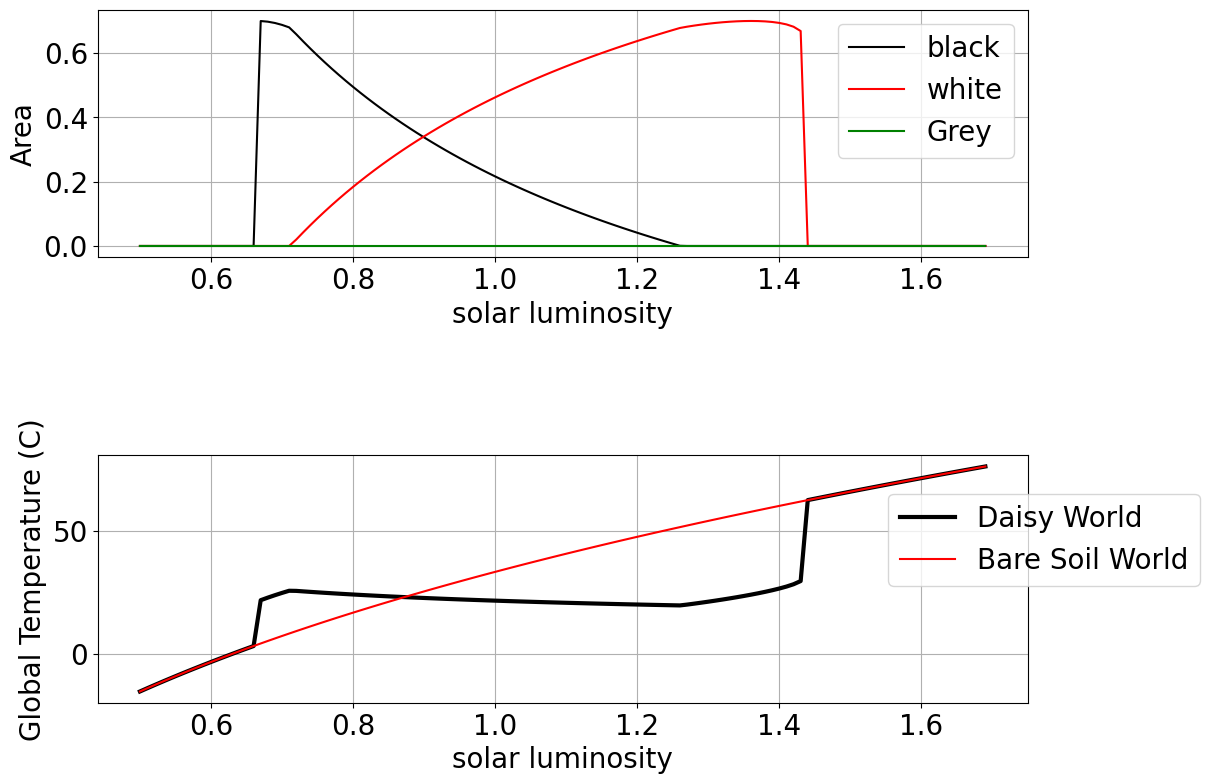

In [ ]:
# print(Albedo_Initializer())
from tqdm import tqdm

value_store_per_state={}
alb_grey=0.20


albedo_values=Albedo_Initializer(state[0])

alb_dw,alb_bs,alb_db=0.75, 0.50, 0.30

area_store=dict(area_dw_v=[],area_db_v=[],area_dg_v=[],area_bs_v=[],T_p_v=[],T_ref=[])




area_dw=area_db=area_dg=0.01 # initial conditions

  #luminosity=[1]

# loop over luminosity...
for iflux,flux in tqdm(enumerate(luminosity)):
    # initial conditions are taken from a previous run, subject to 
    # a minimum of 1% in case the species had died out 
    area_dw=max(area_dw,0.01)   # white daisies can't die out
    area_db=max(area_db,0.01) # black daises neither 
    area_gd= max(area_dg,0.01)  #Grey daisies neither
    area_bs=1.0-area_dw-area_db-area_dg # bare soil fraction
    
    delta_db=delta_dw=delta_dg=1
    
    iloop=0 
    
    while (abs(delta_db)+abs(delta_dw))+abs(delta_dg)>1.e-8:
        iloop+=1
        
        # EQN 5: calculate weighted average albedo
        alb_p=area_dw*alb_dw+ area_db*alb_db + area_bs*alb_bs+area_dg*alb_grey
        
        # EQN 4: calculate planet mean temperature
        T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
        
        # EQN 7: calculate local temperatures
        T_db=transport*(alb_p-alb_db)+T_p
        T_dw=transport*(alb_p-alb_dw)+T_p
        T_dg=transport*(alb_p-alb_grey)+T_p
        
        # EQN 3: calculate birth rate beta
        birth_rate_db=birth_rate(T_db)
        birth_rate_dw=birth_rate(T_dw)
        birth_rate_dg=birth_rate(T_dg)
          
        # EQN 1: change in daisy area
        delta_db=area_db*(birth_rate_db*area_bs-death_rate)
        delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
        delta_dg=area_dg*(birth_rate_dg*area_bs-death_rate)

        area_db+=delta_db
        area_dw+=delta_dw
        area_dg+=delta_dg
        
        # update areas
        area_bs=1.0-area_db-area_dw-area_dg

        #print (area_db,area_dw,area_bs)
    
    # print (flux," converged after iteration ",iloop)

    # store the value...
    area_store['area_db_v'].append(area_db)
    area_store['area_dw_v'].append(area_dw)
    area_store['area_bs_v'].append(area_bs)
    area_store['area_dg_v'].append(area_dg)

    area_store['T_p_v'].append(T_p)
    area_store['T_ref'].append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))
value_store_per_state[0]=area_store


data_state1= value_store_per_state[0]#Unpack the data based on the state of the albedo order
area_db_v=data_state1['area_db_v']

area_dw_v= data_state1['area_dw_v']
area_dg_v= data_state1['area_dg_v']

fig,ax=plt.subplots(2,1,figsize=(12,9))
ax=ax.flatten()
plt.subplots_adjust(wspace=.8,hspace=0.8)
ax[0].plot(luminosity,data_state1['area_db_v'],color='black',label='black')
ax[0].plot(luminosity,data_state1['area_dw_v'],color='red',label='white')
ax[0].plot(luminosity,data_state1['area_dg_v'],color='green',label='Grey')
ax[0].set_xlabel('solar luminosity')
ax[0].set_ylabel('Area')
# ax[0].set_title(r'Once $A_{db}<A_{bs}<A_{dw}$')
ax[0].grid('on')
ax[0].legend(loc="best")


plt.subplots_adjust(wspace=.8,hspace=0.8)
ax[1].plot(luminosity,np.array(data_state1['T_p_v'])-keloff,color="black",label="Daisy World ",linewidth=3)
ax[1].plot(luminosity,np.array(data_state1['T_ref'])-keloff,color="red",label="Bare Soil World")
ax[1].set_xlabel('solar luminosity')
ax[1].set_ylabel('Global Temperature (C)')
# ax[1].set_title(r'Once $A_{db}<A_{bs}<A_{dw}$')
ax[1].grid()
ax[1].legend(bbox_to_anchor=(1.2,0.9))




>> The order of albedo didn't change




120it [00:00, 465.22it/s]


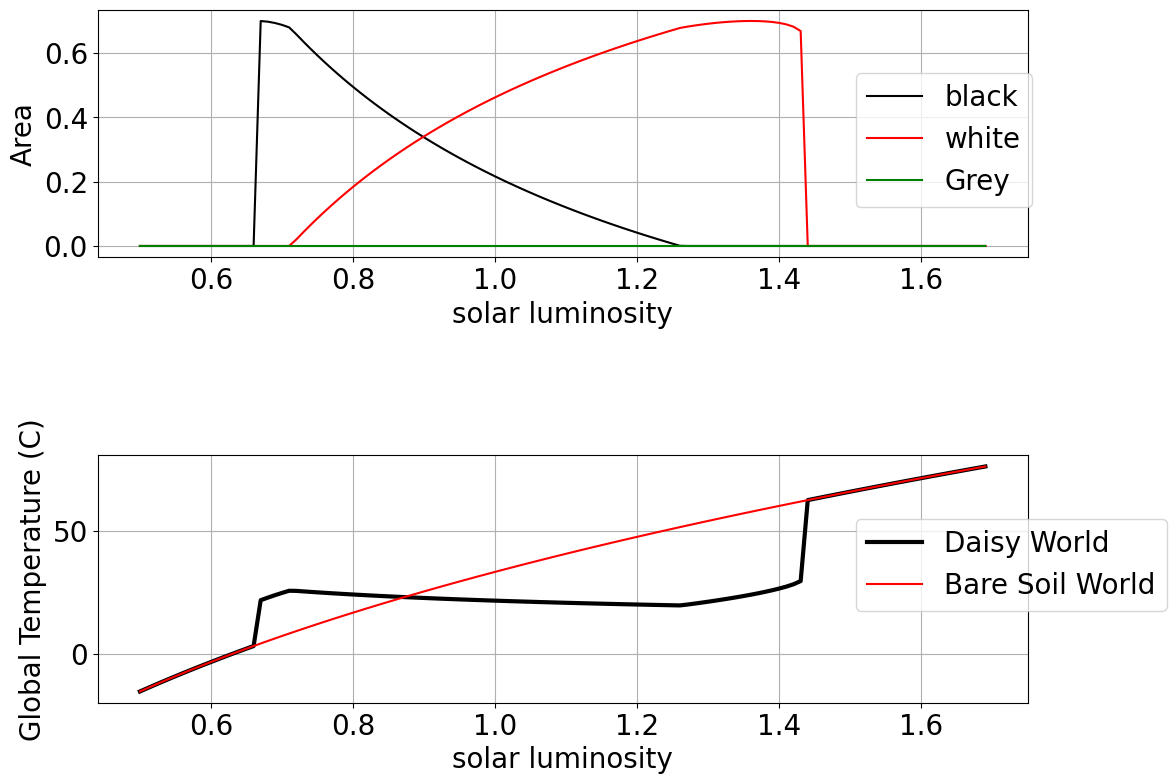

In [ ]:
# print(Albedo_Initializer())
from tqdm import tqdm

value_store_per_state={}
alb_grey=0.90


albedo_values=Albedo_Initializer(state[0])

alb_dw,alb_bs,alb_db=0.75, 0.50, 0.30

area_store=dict(area_dw_v=[],area_db_v=[],area_dg_v=[],area_bs_v=[],T_p_v=[],T_ref=[])




area_dw=area_db=area_dg=0.01 # initial conditions

  #luminosity=[1]

# loop over luminosity...
for iflux,flux in tqdm(enumerate(luminosity)):
    # initial conditions are taken from a previous run, subject to 
    # a minimum of 1% in case the species had died out 
    area_dw=max(area_dw,0.01)   # white daisies can't die out
    area_db=max(area_db,0.01) # black daises neither 
    area_gd= max(area_dg,0.01)  #Grey daisies neither
    area_bs=1.0-area_dw-area_db-area_dg # bare soil fraction
    
    delta_db=delta_dw=delta_dg=1
    
    iloop=0 
    
    while (abs(delta_db)+abs(delta_dw))+abs(delta_dg)>1.e-8:
        iloop+=1
        
        # EQN 5: calculate weighted average albedo
        alb_p=area_dw*alb_dw+ area_db*alb_db + area_bs*alb_bs+area_dg*alb_grey
        
        # EQN 4: calculate planet mean temperature
        T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
        
        # EQN 7: calculate local temperatures
        T_db=transport*(alb_p-alb_db)+T_p
        T_dw=transport*(alb_p-alb_dw)+T_p
        T_dg=transport*(alb_p-alb_grey)+T_p
        
        # EQN 3: calculate birth rate beta
        birth_rate_db=birth_rate(T_db)
        birth_rate_dw=birth_rate(T_dw)
        birth_rate_dg=birth_rate(T_dg)
          
        # EQN 1: change in daisy area
        delta_db=area_db*(birth_rate_db*area_bs-death_rate)
        delta_dw=area_dw*(birth_rate_dw*area_bs-death_rate)
        delta_dg=area_dg*(birth_rate_dg*area_bs-death_rate)

        area_db+=delta_db
        area_dw+=delta_dw
        area_dg+=delta_dg
        
        # update areas
        area_bs=1.0-area_db-area_dw-area_dg

        #print (area_db,area_dw,area_bs)
    
    # print (flux," converged after iteration ",iloop)

    # store the value...
    area_store['area_db_v'].append(area_db)
    area_store['area_dw_v'].append(area_dw)
    area_store['area_bs_v'].append(area_bs)
    area_store['area_dg_v'].append(area_dg)

    area_store['T_p_v'].append(T_p)
    area_store['T_ref'].append(np.power(flux*S0*(1-alb_bs)/sigma,0.25))
value_store_per_state[0]=area_store


data_state1= value_store_per_state[0]#Unpack the data based on the state of the albedo order
area_db_v=data_state1['area_db_v']

area_dw_v= data_state1['area_dw_v']
area_dg_v= data_state1['area_dg_v']

fig,ax=plt.subplots(2,1,figsize=(12,9))
ax=ax.flatten()
plt.subplots_adjust(wspace=.8,hspace=0.8)
ax[0].plot(luminosity,data_state1['area_db_v'],color='black',label='black')
ax[0].plot(luminosity,data_state1['area_dw_v'],color='red',label='white')
ax[0].plot(luminosity,data_state1['area_dg_v'],color='green',label='Grey')
ax[0].set_xlabel('solar luminosity')
ax[0].set_ylabel('Area')
# ax[0].set_title(r'Once $A_{db}<A_{bs}<A_{dw}$')
ax[0].grid('on')
ax[0].legend(bbox_to_anchor=(0.8,0.8))


plt.subplots_adjust(wspace=.8,hspace=0.8)
ax[1].plot(luminosity,np.array(data_state1['T_p_v'])-keloff,color="black",label="Daisy World ",linewidth=3)
ax[1].plot(luminosity,np.array(data_state1['T_ref'])-keloff,color="red",label="Bare Soil World")
ax[1].set_xlabel('solar luminosity')
ax[1].set_ylabel('Global Temperature (C)')
# ax[1].set_title(r'Once $A_{db}<A_{bs}<A_{dw}$')
ax[1].grid()
ax[1].legend(bbox_to_anchor=(0.8,0.8))



# It is clear that increasing daisy species doesn't change alot. To get the change requires to assign on it the albedo between black and bare soil daisies.

# Another way of using class to implement the work

In [ ]:
q=2.06E9  #In k^4
B=0.25

def T_opt(q,q_l=80.):
  return (q/q_l)**(1./3.)



def T_I(L,alb_bs,area_bs,S=917,sigma=5.67E-8,q_l=80.):
  A_planete= alb_bs*area_bs
 
  return S*L*(1.-A_planete)/sigma


def area_dw_new(L,alb_bs,area_bs,gamma,q,B=0.25,q_l=80.,k=1./(17.5)**2):
  T_i=T_I(L,alb_bs,area_bs)
  T_optt=T_opt(q,q_l)
  return 0.5+((T_optt-T_i)/(2.*B*(q_l-2.*T_i)))-gamma/(2.*(1.-k*q_l**2*B**2))


def area_db_new(L,alb_bs,area_bs,gamma,B=0.25,q_l=80.,k=1./(17.5)**2):
  topt=T_opt(q,q_l)
  T_i=T_I(L,alb_bs,area_bs)
  return 0.5-((topt-T_i)/(2.*B*(q_l-2.*T_i)))-gamma/(2.*(1.-k*q_l**2*B**2))

def SumOfDaisy(gamma,k=1./(17.5)**2,B=0.25,q_l=80.):
  return 1.-gamma/(1.-k*q_l**2*B**2)

def NewTempOf_Planet(L,A_planete,S=917,sigma=5.67E-8,q_l=80.):
 
  return S*L*(1.-A_planete)/sigma


def Tb(alb_bs,area_bs,area_dw,area_db,L,q,q_l=80.,B=0.25):
  diff=area_dw-area_db 
  T_i=T_I(L,alb_bs,area_bs)
  return diff*(q_l-2.*T_i)*B+q_l*B+T_i

def Tw(alb_bs,area_bs,area_dw,area_db,L,q,q_l=80.,B=0.25):
  diff=area_dw-area_db 
  T_i=T_I(L,alb_bs,area_bs)
  return diff*(q_l-2.*T_i)*B-q_l*B+T_i


In [ ]:
T_opts=22.5+273.15
def birth_rate(T):
  return max(1.-0.003265*(T_opts-T)**2,0.0)

In [ ]:
class DaisyModel:

  def __init__(self,Lum_min,Lum_max):
    self.Lum_min=Lum_min
    self.Lum_max=Lum_max
    self.alb_bs=0.50
    self.alb_db=0.25
    self.alb_dw=0.75
    self.k=0.3265
    self.death_rate=0.3
    self.sigma=5.67E-8
    self.solar_rad=917.

  def Albedo_default(self):
    return (0.25, 0.50, 0.75)

 

  def Albedo(self,x=False,y=False,z=False):
    if x:
      self.alb_db=x
    if y:
      self.alb_bs=y
    if z:
      self.alb_dw=z
    return self.alb_db, self.alb_bs, self.alb_dw
  def T_opt(self):
    return 22.5

  def TempFrom_K_to_cel(self,T):
    return T-273.15

  def B_rate(self,T):
    if T>273.25:
      T=self.TempFrom_K_to_cel(T)
    topt=self.T_opt()
    if np.abs(topt-T)<self.k:
      return 1.-self.k*(topt-T)**2
    else:
      return 0. 
  def Death_rate_update(self,new_death_rate=False):
    if new_death_rate:
      self.death_rate=new_death_rate
    return self.death_rate

  def Luminosity(self):
    Lmin, Lmax=self.Lum_min, self.Lum_max
    return np.arange(Lmin,Lmax,0.15)

  def A_planet(self,area_db,area_bs,area_dw):
    return area_db, area_bs, area_dw

  def Planet_Albedo(self,area_db,area_bs, area_dw):
    a_1,a_2,a_3=self.Albedo()

    area_db, area_bs, area_dw=self.A_planet(area_db, area_bs, area_dw)

    return a_1*area_db + a_2*area_bs + a_3*area_dw


  def T_planet(self, area_db, area_bs, area_dw):
    luminosity=self.Luminosity()
    A_p=self.Planet_Albedo(area_db,area_bs, area_dw)

    return (self.solar_rad* luminosity*(1-A_p)/self.sigma)**0.25

  def Luminosity_factor(self,q=False):
    if q:
      return q
    else:
      return 20.

  def white_Temp(self,area_db,area_bs, area_dw,q=False):
  
    q=self.Luminosity_factor(q)
   

    return np.power(q*(self.Planet_Albedo(area_db,area_bs, area_dw)-self.alb_dw)+self.T_planet(area_db,area_bs, area_dw)**4,0.25)

  def black_Temp(self,area_db,area_bs, area_dw,q=False):
  
    q=self.Luminosity_factor(q)
   

    return np.power(q*(self.Planet_Albedo(area_db,area_bs, area_dw)-self.alb_db)+self.T_planet(area_db,area_bs, area_dw)**4,0.25)

  def White_Daisy_update(self,area_bs, area_dw,T,q=False):
    return area_dw*(area_bs*self.B_rate(T)-self.death_rate)

  def Black_Daisy_update(self,area_db,area_bs, area_dw,T,q=False):
    return area_db*(area_bs*self.B_rate(T)-self.death_rate)

    

In [ ]:
model=DaisyModel(0.5,1.65)

In [ ]:
model.Albedo(0.4)

In [ ]:
model.Death_rate_update(0.9)

In [ ]:
model.alb_db

In [ ]:
model.Albedo_default()

In [ ]:
model.Black_Daisy_update(0.1,0.1,0.01,30)

In [ ]:
T=model.T_planet(0.1,0.1,0.1)

In [ ]:
T_w=model.white_Temp(0.1,0.1,0.1)

In [ ]:
L=model.Luminosity()

In [ ]:
plt.plot(L,T_w)

# By changing

In [ ]:

Td_ideal=22.5+keloff  # peak growth rate for daisies
birth_rate_k=0.003265 #
death_rate=0.3 # fixed death rate gamma in equation 1

T_opt=np.arange(15,28.5,1.5)


print(T_opt.shape)



(9,)


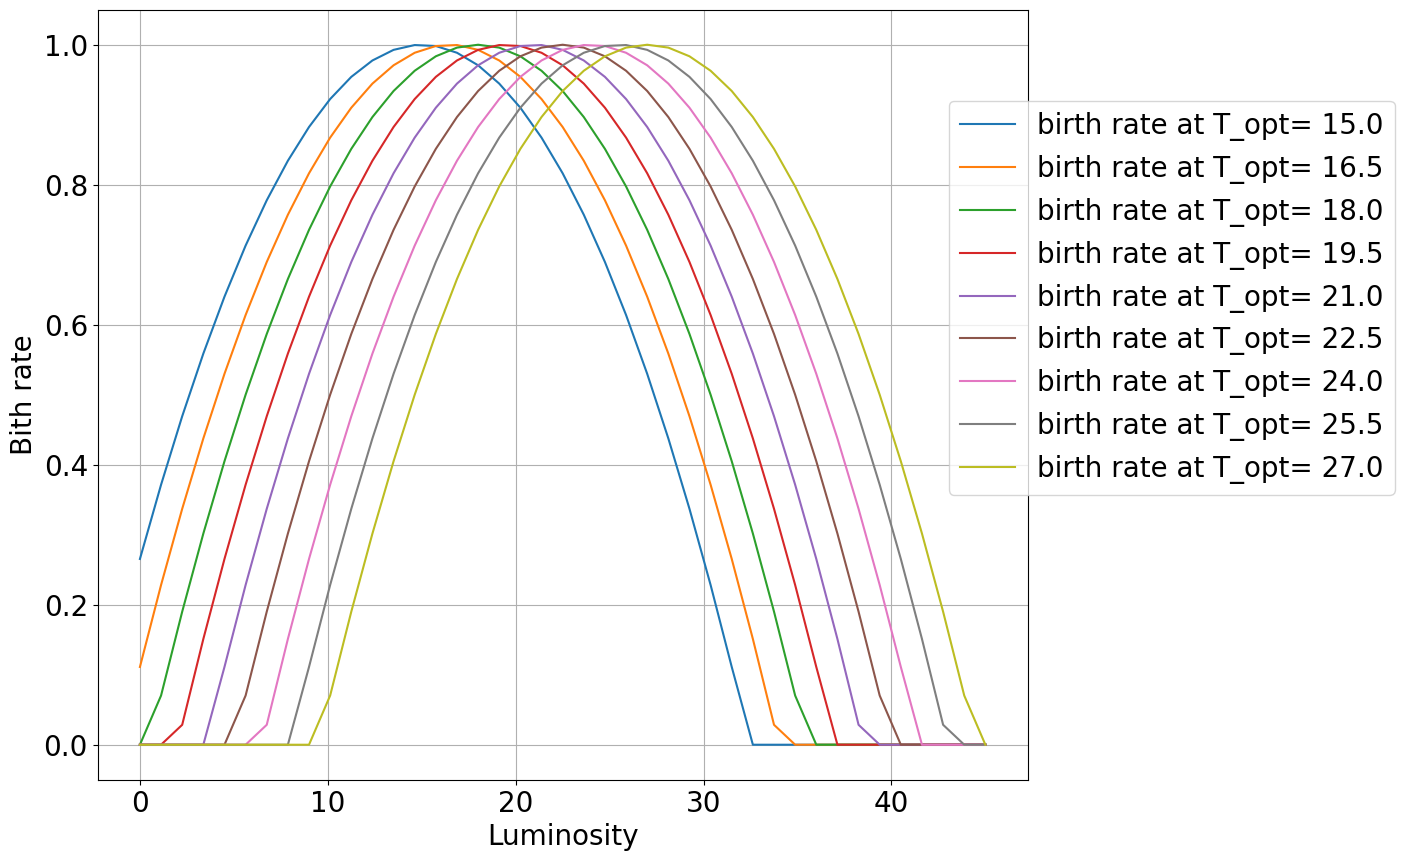

In [ ]:
# T_opt
tarr=np.linspace(0,45,41)+keloff

def birth_rate(T,T_opt):
  return max(1.-0.003265*(T_opt-T)**2,0.0)

dict_beta=dict()
# fig,axs=plt.subplots(3,3,figsize=(12,9))
# ax=axs.flatten()
plt.figure(figsize=(12,10))
for i in range(len(T_opt)):
  
  name='beta_' + str(T_opt[i])
  br=[birth_rate(t,T_opt[i]+keloff) for t in tarr]
  dict_beta[name]=zip(br,tarr)
  plt.plot(tarr-keloff,br,label='birth rate at T_opt= %s'%T_opt[i])
  plt.plot()
  plt.grid('on')
  plt.legend(bbox_to_anchor=(0.9,0.9))
plt.xlabel('Luminosity')
plt.ylabel('Bith rate')
# changing the fontsize of yticks
plt.yticks(fontsize=20)
# changing the fontsize of xticks
plt.xticks(fontsize=20)
plt.savefig('birth_rate_at_%s.jpg'%T_opt[i],dpi=400)
plt.show()